# LOAN ELIGIBILITY EXPLORATORY DATA ANALYSIS

In [2]:
!conda env list

# conda environments:
#
base                  *  /home/rajesh/anaconda3
DecisionTree_DEPLOYMENT     /home/rajesh/anaconda3/envs/DecisionTree_DEPLOYMENT
DogCatAzure              /home/rajesh/anaconda3/envs/DogCatAzure
cg-nlu                   /home/rajesh/anaconda3/envs/cg-nlu
dogcatclassifier         /home/rajesh/anaconda3/envs/dogcatclassifier
lableimg                 /home/rajesh/anaconda3/envs/lableimg
rasa_new                 /home/rajesh/anaconda3/envs/rasa_new
rasaxproject             /home/rajesh/anaconda3/envs/rasaxproject
tf1                      /home/rajesh/anaconda3/envs/tf1
tf1_new                  /home/rajesh/anaconda3/envs/tf1_new
tf2                      /home/rajesh/anaconda3/envs/tf2
tfod                     /home/rajesh/anaconda3/envs/tfod
tfod1                    /home/rajesh/anaconda3/envs/tfod1



In [5]:
import matplotlib.pyplot as plt

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sweetviz as sv
from pandas_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from scipy.stats import chi2
%matplotlib inline

In [14]:
!pip install autoviz


     |████████████████████████████████| 157.5 MB 30 kB/s  eta 0:00:01


In [20]:
##This is to display the numerical values as decimals instead of scientific notations like 5.951188e+08
pd.set_option('float_format', '{:f}'.format)

In [21]:
plt.figure(figsize=(8,7))
plt.style.use('seaborn-whitegrid')

<Figure size 576x504 with 0 Axes>

In [28]:
data=pd.read_csv('credit_ver10.csv')

In [29]:
data.head()

AttributeError: 'NoneType' object has no attribute 'items'

   Current Loan Amount  Credit Score  Annual Income  Years in current job  \
0        445412.000000    709.000000 1167493.000000              8.000000   
1        262328.000000    740.400000 1470550.600000             10.000000   
2        496830.400000    741.000000 2231892.000000              8.000000   
3        347666.000000    721.000000  806949.000000              3.000000   
4        176220.000000    731.600000 1034287.800000              5.000000   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0   5214.740000                17.200000                      0.000000   
1  33295.980000                21.100000                      8.000000   
2  29200.530000                14.900000                     29.000000   
3   8741.900000                12.000000                      0.000000   
4  20639.700000                 6.100000                      0.000000   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0          

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Loan Status                   110000 non-null  float64
 12  Term                          110000 non-nul

#### Dropping the ID columns as this doesn't add any business value .

In [58]:
data=data.drop(['Loan ID','Customer ID'],axis=1)

In [31]:
data.head()

AttributeError: 'NoneType' object has no attribute 'items'

   Current Loan Amount  Credit Score  Annual Income  Years in current job  \
0        445412.000000    709.000000 1167493.000000              8.000000   
1        262328.000000    740.400000 1470550.600000             10.000000   
2        496830.400000    741.000000 2231892.000000              8.000000   
3        347666.000000    721.000000  806949.000000              3.000000   
4        176220.000000    731.600000 1034287.800000              5.000000   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0   5214.740000                17.200000                      0.000000   
1  33295.980000                21.100000                      8.000000   
2  29200.530000                14.900000                     29.000000   
3   8741.900000                12.000000                      0.000000   
4  20639.700000                 6.100000                      0.000000   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0          

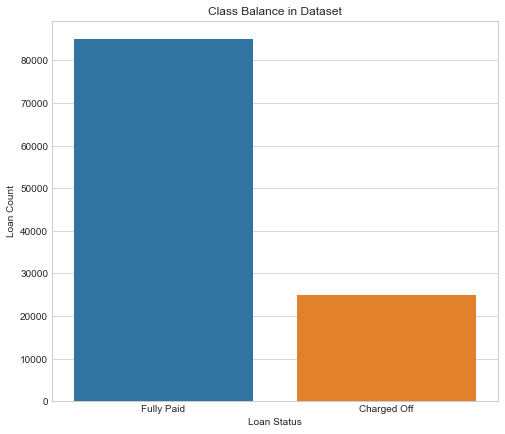

In [60]:
#Checking balance in classes
plt.figure(figsize=(8,7))
sns.countplot(data['Loan Status'])
plt.title('Class Balance in Dataset')
plt.ylabel('Loan Count')
plt.show()

In [61]:
# % of class balance
print((data['Loan Status'].value_counts()/len(data['Loan Status']))*100)

Fully Paid     77.321818
Charged Off    22.678182
Name: Loan Status, dtype: float64


#### Above is expected as generally the positive class or the Charged off class here will be a minority class .

###  Missing Value Check

In [62]:

print(data.isnull().sum())

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21135
Annual Income                   21135
Years in current job             4649
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    58447
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      226
Tax Liens                          11
dtype: int64


In [63]:
data.columns[data.isnull().any()]

Index(['Credit Score', 'Annual Income', 'Years in current job',
       'Months since last delinquent', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

## Handling Missing Values & Data Distribution Check

### Feature 1: Months since last delinquent

####  Missing Value Check .

In [64]:
data['Months since last delinquent'].unique()

array([ nan,   8.,  29.,  10.,  33.,  76.,  25.,  46.,  34.,  53.,  30.,
        32.,  21.,  50.,  20.,  24.,  15.,   6.,  13.,  48.,  69.,  42.,
        35.,   7.,  27.,   5.,  26.,  17.,  72.,  65.,   4.,  11.,  54.,
        31.,  19.,  41.,  73.,  60.,  77.,  18.,   9.,  80.,  70.,  38.,
        47.,  82.,  74.,   0.,  16.,  75.,  61.,  79.,  62.,  56.,  64.,
        36.,  39.,  59.,  55.,  37.,  58.,  68.,  22.,  45.,  14.,  51.,
        49.,   1.,  81.,  63.,  71.,  43.,  40.,  12.,  52.,   3.,  66.,
        23.,  57.,  78.,  44.,   2.,  28.,  88.,  67.,  85.,  89., 118.,
        83., 152., 120.,  92.,  86.,  94., 110.,  93.,  97.,  84., 130.,
       129., 106.,  90., 107., 176., 108.,  87., 139., 143., 114.,  91.,
       104., 115., 100., 148., 141.,  96., 131.])

In [65]:
data.to_csv('D:\\iNeuron\\intership_2\\credit_ver1.csv',index=False)

In [66]:
data['Months since last delinquent']=data['Months since last delinquent'].replace(np.nan,0)

In [67]:
data.columns[data.isnull().any()]

Index(['Credit Score', 'Annual Income', 'Years in current job',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

#### Delinquency Data Distribution .

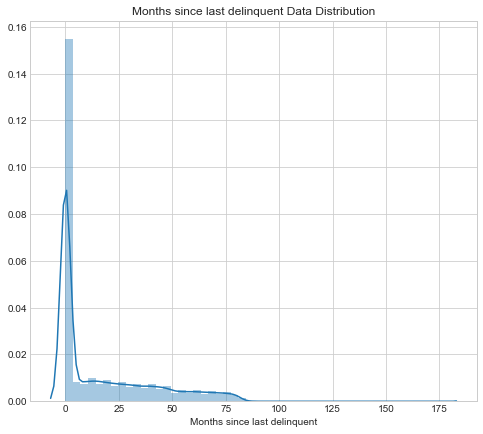

In [68]:
plt.figure(figsize=(8,7))
sns.distplot(data['Months since last delinquent'])
plt.title ('Months since last delinquent Data Distribution')
plt.show()


### Feature 2: Years in current job

#### Missing Value Check .

In [69]:
print(data['Years in current job'].isnull().sum())

4649


In [70]:
print(data['Years in current job'].unique())

['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']


[]

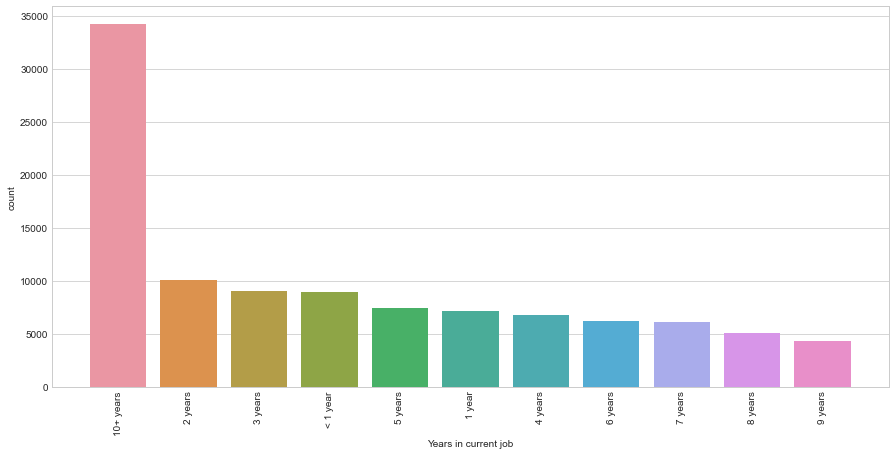

In [71]:
plt.figure(figsize=(15,7))
sns.countplot(data['Years in current job'],order=data['Years in current job'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

In [33]:
##saving the current file.

data.to_csv('D:\\iNeuron\\intership_2\\credit_ver2.csv',index=False)

In [72]:
Years=[]
for i in data['Years in current job']:
    
    if i=='8 years':
        Years.append(8)
    elif i=='6 years':
        Years.append(6)
    elif i=='3 years':
        Years.append(3)
    elif i=='5 years':
        Years.append(5)
    elif i=='< 1 year':
        Years.append(0.8)
    elif i=='2 years':
        Years.append(2)
    elif i=='4 years':
        Years.append(4)
    elif i=='9 years':
        Years.append(9)
    elif i=='7 years':
        Years.append(7)
    elif i=='1 year':
        Years.append(1)
    else :
        
        Years.append(10)

In [73]:
def unique(list1): 
    x = np.array(list1) 
    print(np.unique(x))
print(unique(Years))

[ 0.8  1.   2.   3.   4.   5.   6.   7.   8.   9.  10. ]
None


In [74]:
data['Years in current job']=Years

In [75]:
print(data['Years in current job'].unique())

[ 8.  10.   3.   5.   0.8  2.   4.   9.   7.   1.   6. ]


In [76]:
data.columns[data.isnull().any()]

Index(['Credit Score', 'Annual Income', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

#### Work Experience Data Distribution .

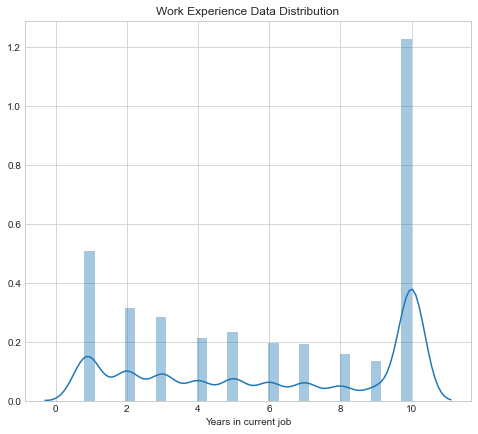

In [78]:
plt.figure(figsize=(8,7))
sns.distplot(data['Years in current job'])
plt.title ('Work Experience Data Distribution')
plt.show()

[]

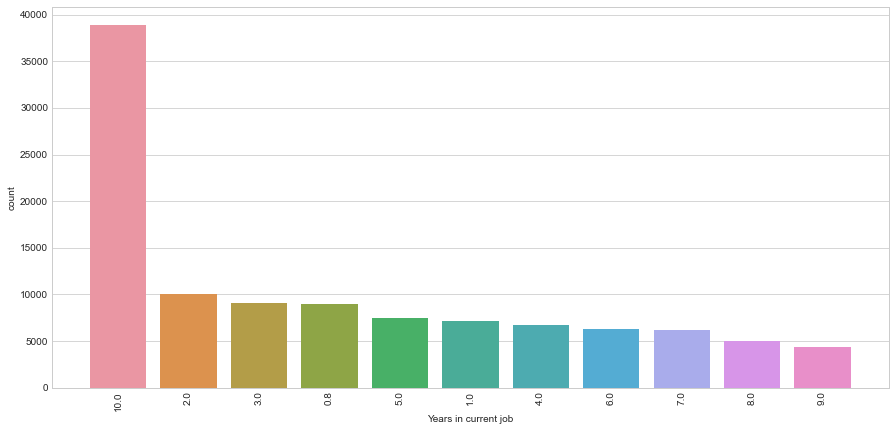

In [79]:
plt.figure(figsize=(15,7))
sns.countplot(data['Years in current job'],order=data['Years in current job'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

In [80]:
##saving the current file.

data.to_csv('D:\\iNeuron\\intership_2\\credit_ver3.csv',index=False)

In [85]:
#Remaining columns
data.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21135
Annual Income                   21135
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      226
Tax Liens                          11
dtype: int64

### Feature 3: Credit Score.

#### Credit Score Data Distribution .

In [87]:
print(data['Credit Score'].describe())

count    88865.000000
mean      1076.594644
std       1475.581902
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64


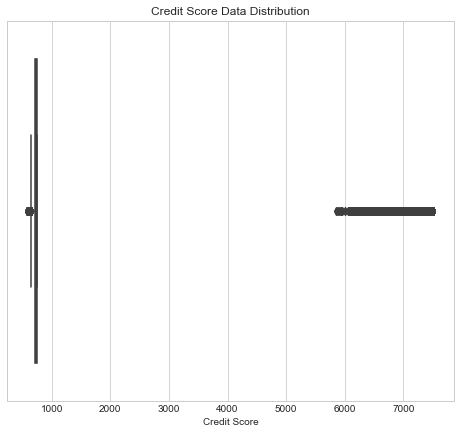

In [89]:
plt.figure(figsize=(8,7))
sns.boxplot(data['Credit Score'])
plt.title ('Credit Score Data Distribution')
plt.show()

In [90]:
data[data['Credit Score']>900]

Loan Status  Current Loan Amount        Term  Credit Score  \
5       Charged Off               206602  Short Term        7290.0   
43      Charged Off               288948  Short Term        7120.0   
51      Charged Off               219692   Long Term        6610.0   
56      Charged Off                78012  Short Term        7380.0   
65      Charged Off               523908   Long Term        7370.0   
...             ...                  ...         ...           ...   
109889   Fully Paid               765534   Long Term        7200.0   
109940   Fully Paid               133870  Short Term        7360.0   
109946   Fully Paid               124256  Short Term        7180.0   
109969   Fully Paid               243782  Short Term        7340.0   
109977   Fully Paid               668118   Long Term        6640.0   

        Annual Income  Years in current job Home Ownership  \
5            896857.0                  10.0  Home Mortgage   
43           537472.0                  10.0           Rent   
51           527839.0                  10.0           Rent   
56           728726.0                   4.0           Rent   
65          1028774.0                   6.0  Home Mortgage   
...               ...                   ...            ...   
109889      2455674.0                   1.0  Home Mortgage   
109940       481745.0                   3.0           Rent   
109946       714305.0                  10.0       Own Home   
109969      1074317.0                  10.0           Rent   
109977      1701089.0                  10.0  Home Mortgage   

                   Purpose  Monthly Debt  Years of Credit History  \
5       Debt Consolidation      16367.74                     17.3   
43      Debt Consolidation       5777.90                     14.8   
51      Debt Consolidation      14207.63                     17.0   
56          major_purchase      10135.36                     11.4   
65      Debt Consolidation      22632.99                     19.3   
...                    ...           ...                      ...   
109889  Debt Consolidation      59345.55                     17.0   
109940  Debt Consolidation      10196.92                      8.0   
109946  Debt Consolidation      19405.46                     11.6   
109969  Debt Consolidation      16383.32                     20.9   
109977  Debt Consolidation      32179.16                     15.3   

        Months since last delinquent  Number of Open Accounts  \
5                                0.0                        6   
43                               0.0                        4   
51                              48.0                        9   
56                               0.0                        8   
65                               0.0                        5   
...                              ...                      ...   
109889                           0.0                       10   
109940                           0.0                       11   
109946                          79.0                        9   
109969                          51.0                       12   
109977                           0.0                       15   

        Number of Credit Problems  Current Credit Balance  \
5                               0                  215308   
43                              0                  132468   
51                              0                  254277   
56                              0                  104633   
65                              0                  474658   
...                           ...                     ...   
109889                          0                  196517   
109940                          0                   82023   
109946                          1                   35112   
109969                          0                  194750   
109977                          0                  547618   

        Maximum Open Credit  Bankruptcies  Tax Liens  
5                  27244

In [93]:
##Handling the incorrect credit score values.

Cr_Scr=[]
for i in data['Credit Score']:
    if np.isnan(i):
        Cr_Scr.append(i)
    else :
        if float(str(i)[:3])>900:
                 Cr_Scr.append(900.0)
        else :
                 Cr_Scr.append(float(str(i)[:3]))
                 
                 
                 

In [94]:
print(len(Cr_Scr))

110000


In [95]:
data['Credit Score']=Cr_Scr

In [96]:
print(data['Credit Score'].describe())

count    88865.000000
mean       716.323930
std         28.291419
min        585.000000
25%        703.000000
50%        722.000000
75%        739.000000
max        751.000000
Name: Credit Score, dtype: float64


In [97]:
data['Credit Score'].isnull().sum()

21135

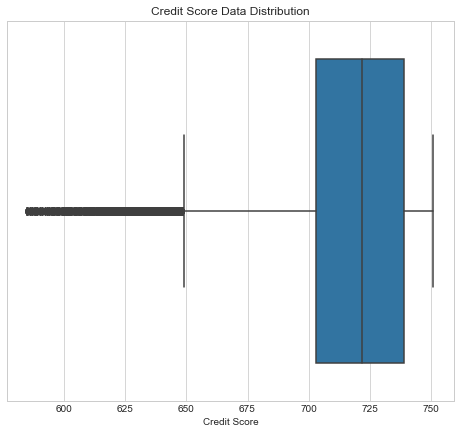

In [98]:
plt.figure(figsize=(8,7))
sns.boxplot(data['Credit Score'])
plt.title ('Credit Score Data Distribution')
plt.show()

In [100]:
##saving the current file.

data.to_csv('D:\\iNeuron\\intership_2\\credit_ver4.csv',index=False)

### Feature 4: Home Ownership .

#### Data Quality Check .

[]

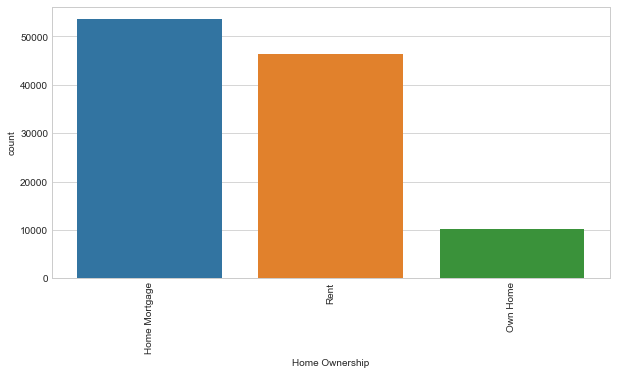

In [107]:
plt.figure(figsize=(10,5))
sns.countplot(data['Home Ownership'],order=data['Home Ownership'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

In [103]:
data['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [104]:
data.replace({'Home Ownership' :{'HaveMortgage':'Home Mortgage'}},inplace=True)

[]

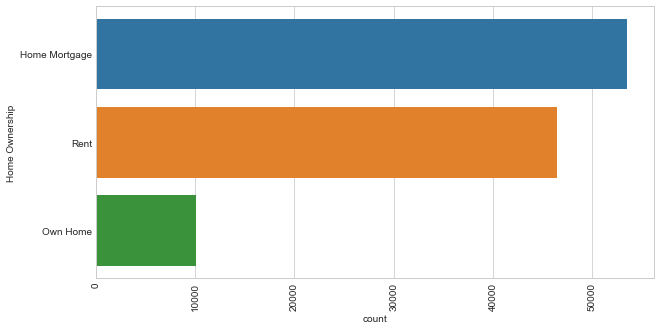

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(y=data['Home Ownership'],order=data['Home Ownership'].value_counts().index)
plt.xticks(rotation=90)
plt.plot()

In [115]:
##saving the current file.

data.to_csv('D:\\iNeuron\\intership_2\\credit_ver5.csv',index=False)

### Feature 5: Purpose .

#### Data Quality Check .

[]

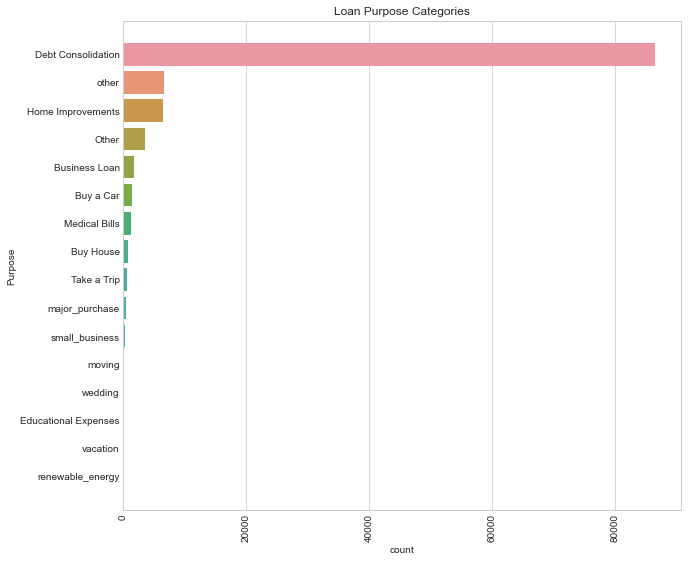

In [114]:
plt.figure(figsize=(10,9))
sns.countplot(y=data['Purpose'],order=data['Purpose'].value_counts().index)
plt.title('Loan Purpose Categories')
plt.xticks(rotation=90)
plt.plot()

In [111]:
print(data['Purpose'].unique())

['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy']


In [116]:
data.replace({'Purpose':{'other':'Other','Take a Trip':'vacation'}},inplace=True)

[]

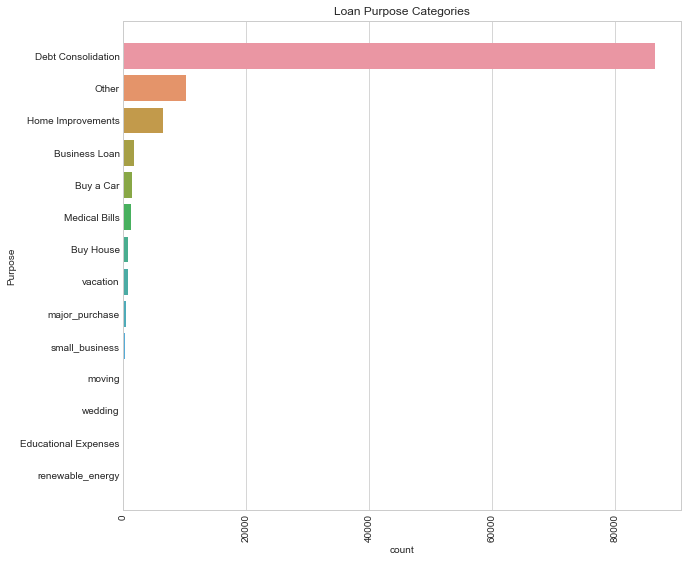

In [117]:
plt.figure(figsize=(10,9))
sns.countplot(y=data['Purpose'],order=data['Purpose'].value_counts().index)
plt.title('Loan Purpose Categories')
plt.xticks(rotation=90)
plt.plot()

In [118]:
print(data['Purpose'].unique())

['Home Improvements' 'Debt Consolidation' 'Buy House' 'Other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'vacation' 'small_business'
 'Medical Bills' 'wedding' 'Educational Expenses' 'moving'
 'renewable_energy']


In [119]:
##saving the current file.

data.to_csv('D:\\iNeuron\\intership_2\\credit_ver6.csv',index=False)

### Feature 6: Term .


#### Data Quality Check .

[]

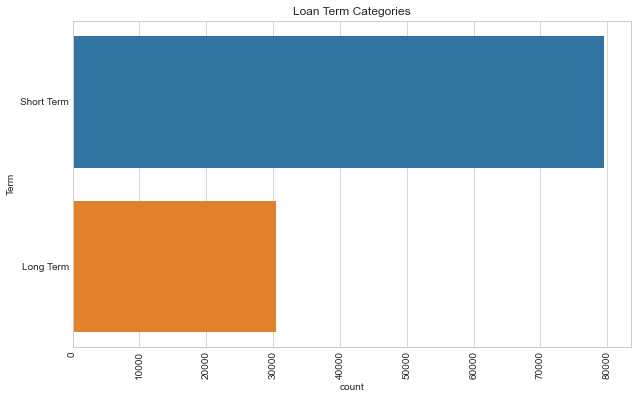

In [122]:
plt.figure(figsize=(10,6))
sns.countplot(y=data['Term'],order=data['Term'].value_counts().index)
plt.title('Loan Term Categories')
plt.xticks(rotation=90)
plt.plot()

Looks like this feature is fine.

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   110000 non-null  object 
 1   Current Loan Amount           110000 non-null  int64  
 2   Term                          110000 non-null  object 
 3   Credit Score                  88865 non-null   float64
 4   Annual Income                 88865 non-null   float64
 5   Years in current job          110000 non-null  float64
 6   Home Ownership                110000 non-null  object 
 7   Purpose                       110000 non-null  object 
 8   Monthly Debt                  110000 non-null  float64
 9   Years of Credit History       110000 non-null  float64
 10  Months since last delinquent  110000 non-null  float64
 11  Number of Open Accounts       110000 non-null  int64  
 12  Number of Credit Problems     110000 non-nul

### Imputing the data.

KNN Imputing will work only numerical columns . We will first get the numerical columns and impute them and then add them to the main dataset.

In [126]:
num_cols=data.select_dtypes(include=np.number)

In [134]:
data.select_dtypes(include=np.number).columns.to_list()

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

In [127]:
num_cols.head()

Current Loan Amount  Credit Score  Annual Income  Years in current job  \
0               445412         709.0      1167493.0                   8.0   
1               262328           NaN            NaN                  10.0   
2             99999999         741.0      2231892.0                   8.0   
3               347666         721.0       806949.0                   3.0   
4               176220           NaN            NaN                   5.0   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0       5214.74                     17.2                           0.0   
1      33295.98                     21.1                           8.0   
2      29200.53                     14.9                          29.0   
3       8741.90                     12.0                           0.0   
4      20639.70                      6.1                           0.0   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                        6                          1                  228190   
1                       35                          0                  229976   
2                       18                          1                  297996   
3                        9                          0                  256329   
4                       15                          0                  253460   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0  
2             750090.0           0.0        0.0  
3             386958.0           0.0        0.0  
4             427174.0           0.0        0.0

In [128]:
num_cols.isnull().sum()

Current Loan Amount                 0
Credit Score                    21135
Annual Income                   21135
Years in current job                0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      226
Tax Liens                          11
dtype: int64

In [124]:
#Creating instance of KNNImputer.
impute_knn=KNNImputer()

In [129]:
trans=impute_knn.fit_transform(num_cols)

In [132]:
#Checking some dataset. Transformed data is in array format .
trans[:2,:]

array([[4.4541200e+05, 7.0900000e+02, 1.1674930e+06, 8.0000000e+00,
        5.2147400e+03, 1.7200000e+01, 0.0000000e+00, 6.0000000e+00,
        1.0000000e+00, 2.2819000e+05, 4.1674600e+05, 1.0000000e+00,
        0.0000000e+00],
       [2.6232800e+05, 7.4040000e+02, 1.4705506e+06, 1.0000000e+01,
        3.3295980e+04, 2.1100000e+01, 8.0000000e+00, 3.5000000e+01,
        0.0000000e+00, 2.2997600e+05, 8.5078400e+05, 0.0000000e+00,
        0.0000000e+00]])

In [135]:
trans_dataframe=pd.DataFrame(trans,columns=['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens'])

In [136]:
trans_dataframe.head()

Current Loan Amount  Credit Score  Annual Income  Years in current job  \
0             445412.0         709.0      1167493.0                   8.0   
1             262328.0         740.4      1470550.6                  10.0   
2           99999999.0         741.0      2231892.0                   8.0   
3             347666.0         721.0       806949.0                   3.0   
4             176220.0         731.6      1034287.8                   5.0   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0       5214.74                     17.2                           0.0   
1      33295.98                     21.1                           8.0   
2      29200.53                     14.9                          29.0   
3       8741.90                     12.0                           0.0   
4      20639.70                      6.1                           0.0   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0  
2             750090.0           0.0        0.0  
3             386958.0           0.0        0.0  
4             427174.0           0.0        0.0

In [137]:
trans_dataframe.isnull().sum()

Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years in current job            0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [138]:
trans_dataframe.describe()

Current Loan Amount   Credit Score  Annual Income  \
count         1.100000e+05  110000.000000   1.100000e+05   
mean          1.174621e+07     716.286718   1.367203e+06   
std           3.176716e+07      26.477465   9.936971e+05   
min           1.080200e+04     585.000000   7.662700e+04   
25%           1.795860e+05     704.000000   8.682240e+05   
50%           3.120260e+05     721.000000   1.182003e+06   
75%           5.239300e+05     736.400000   1.631119e+06   
max           1.000000e+08     751.000000   1.655574e+08   

       Years in current job   Monthly Debt  Years of Credit History  \
count         110000.000000  110000.000000            110000.000000   
mean               6.128938   18468.526823                18.202485   
std                3.544057   12195.564391                 7.015575   
min                0.800000       0.000000                 3.600000   
25%                3.000000   10211.930000                13.500000   
50%                6.000000   16202.440000                16.900000   
75%               10.000000   23997.522500                21.700000   
max               10.000000  435843.280000                70.500000   

       Months since last delinquent  Number of Open Accounts  \
count                 110000.000000            110000.000000   
mean                      16.359682                11.124491   
std                       23.011923                 5.011093   
min                        0.000000                 0.000000   
25%                        0.000000                 8.000000   
50%                        0.000000                10.000000   
75%                       30.000000                14.000000   
max                      176.000000                76.000000   

       Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
count              110000.000000            1.100000e+05         1.100000e+05   
mean                    0.168055            2.942822e+05         7.540887e+05   
std                     0.484389            3.772773e+05         8.013930e+06   
min                     0.000000            0.000000e+00         0.000000e+00   
25%                     0.000000            1.121950e+05         2.731520e+05   
50%                     0.000000            2.096650e+05         4.673790e+05   
75%                     0.000000            3.674838e+05         7.831835e+05   
max                    15.000000            3.287897e+07         1.539738e+09   

        Bankruptcies      Tax Liens  
count  110000.000000  110000.000000  
mean        0.117591       0.029445  
std         0.351053       0.261042  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         7.000000      15.000000

In [140]:
print(trans_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Bankruptcies                  110000 non-null  float64
 12  Tax Liens                     110000 non-nul

In [141]:
data.select_dtypes(exclude=np.number).columns.to_list()

['Loan Status', 'Term', 'Home Ownership', 'Purpose']

In [142]:
New_Data=pd.concat([trans_dataframe,data[data.select_dtypes(exclude=np.number).columns.to_list()]],axis=1)

In [143]:
New_Data.head()

Current Loan Amount  Credit Score  Annual Income  Years in current job  \
0             445412.0         709.0      1167493.0                   8.0   
1             262328.0         740.4      1470550.6                  10.0   
2           99999999.0         741.0      2231892.0                   8.0   
3             347666.0         721.0       806949.0                   3.0   
4             176220.0         731.6      1034287.8                   5.0   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0       5214.74                     17.2                           0.0   
1      33295.98                     21.1                           8.0   
2      29200.53                     14.9                          29.0   
3       8741.90                     12.0                           0.0   
4      20639.70                      6.1                           0.0   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   

   Maximum Open Credit  Bankruptcies  Tax Liens Loan Status        Term  \
0             416746.0           1.0        0.0  Fully Paid  Short Term   
1             850784.0           0.0        0.0  Fully Paid  Short Term   
2             750090.0           0.0        0.0  Fully Paid  Short Term   
3             386958.0           0.0        0.0  Fully Paid   Long Term   
4             427174.0           0.0        0.0  Fully Paid  Short Term   

  Home Ownership             Purpose  
0  Home Mortgage   Home Improvements  
1  Home Mortgage  Debt Consolidation  
2       Own Home  Debt Consolidation  
3       Own Home  Debt Consolidation  
4           Rent  Debt Consolidation

In [147]:
data.head()

Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid               445412  Short Term         709.0      1167493.0   
1  Fully Paid               262328  Short Term           NaN            NaN   
2  Fully Paid             99999999  Short Term         741.0      2231892.0   
3  Fully Paid               347666   Long Term         721.0       806949.0   
4  Fully Paid               176220  Short Term           NaN            NaN   

   Years in current job Home Ownership             Purpose  Monthly Debt  \
0                   8.0  Home Mortgage   Home Improvements       5214.74   
1                  10.0  Home Mortgage  Debt Consolidation      33295.98   
2                   8.0       Own Home  Debt Consolidation      29200.53   
3                   3.0       Own Home  Debt Consolidation       8741.90   
4                   5.0           Rent  Debt Consolidation      20639.70   

   Years of Credit History  Months since last delinquent  \
0                     17.2                           0.0   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                           0.0   
4                      6.1                           0.0   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                        6                          1                  228190   
1                       35                          0                  229976   
2                       18                          1                  297996   
3                        9                          0                  256329   
4                       15                          0                  253460   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0  
2             750090.0           0.0        0.0  
3             386958.0           0.0        0.0  
4             427174.0           0.0        0.0

In [145]:
print(New_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Bankruptcies                  110000 non-null  float64
 12  Tax Liens                     110000 non-nul

In [146]:
##saving the current file.

New_Data.to_csv('D:\\iNeuron\\intership_2\\credit_ver7.csv',index=False)

### Correlation Check

### Pearson Correlation.

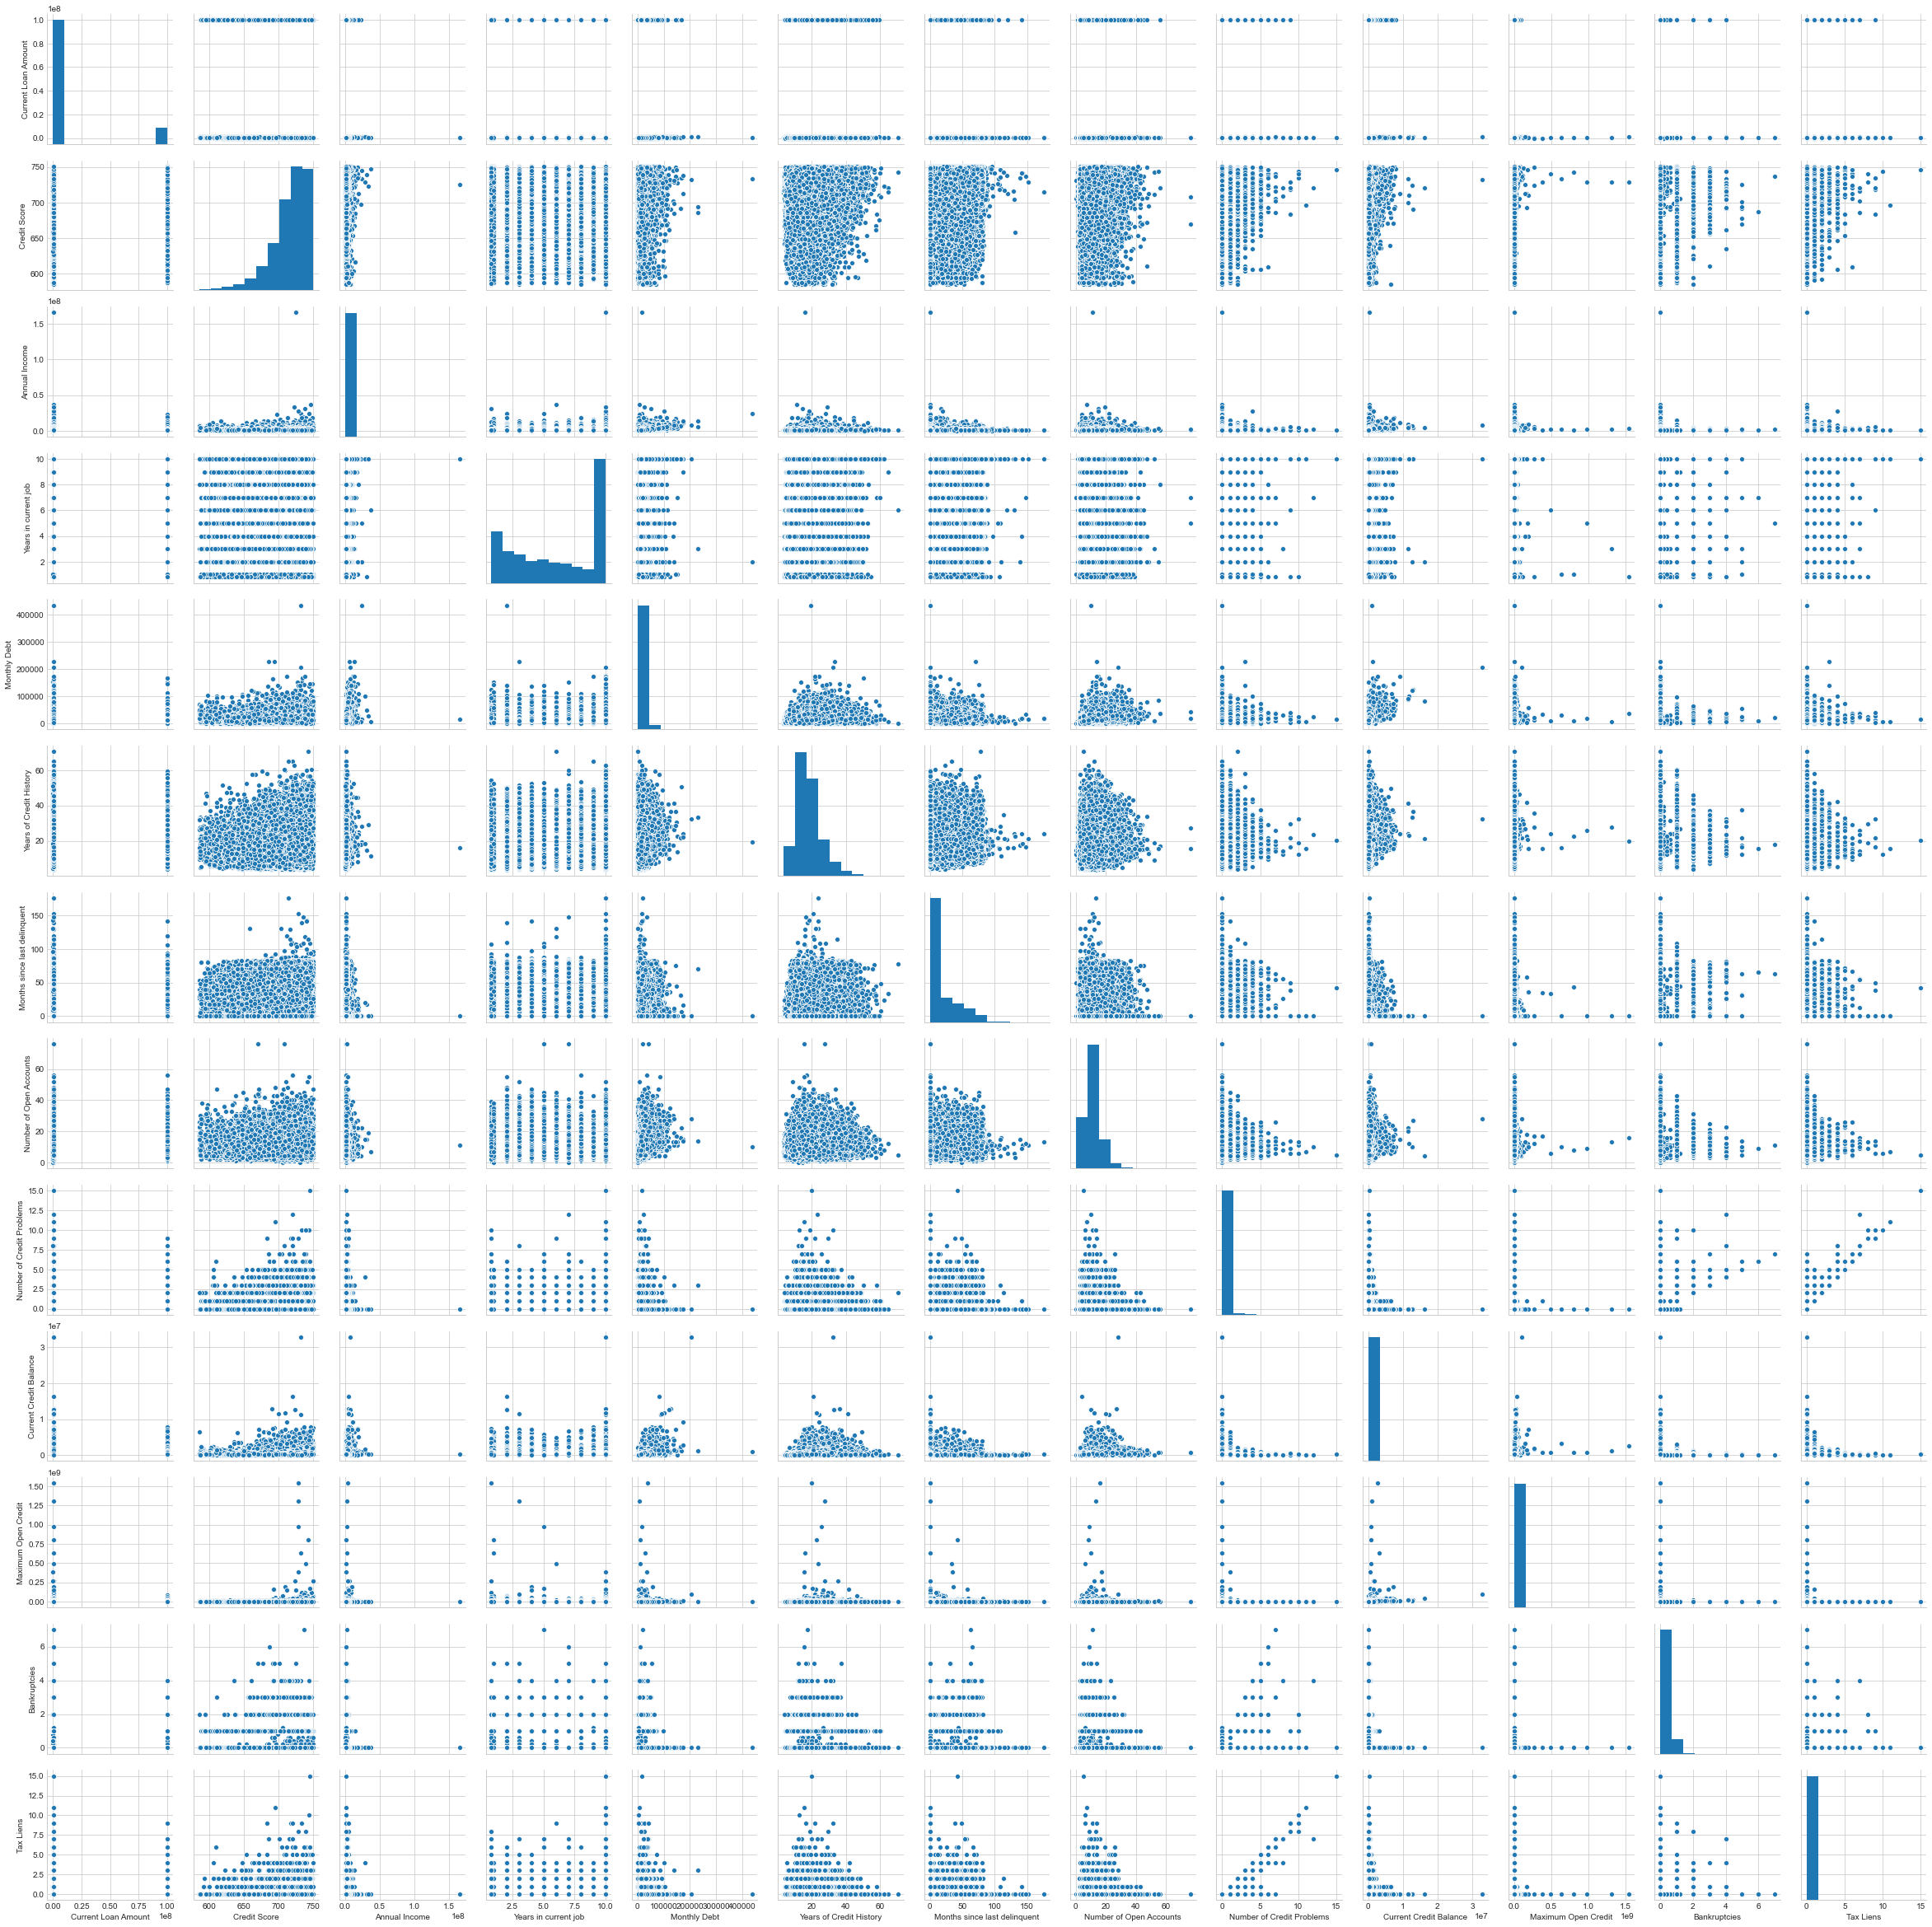

In [148]:

sns.pairplot(trans_dataframe)
plt.show()

In [149]:
corr=trans_dataframe.corr()
corr

Current Loan Amount  Credit Score  \
Current Loan Amount                      1.000000      0.127547   
Credit Score                             0.127547      1.000000   
Annual Income                            0.016255     -0.014307   
Years in current job                    -0.003915     -0.015110   
Monthly Debt                            -0.008013     -0.095479   
Years of Credit History                  0.019465      0.069188   
Months since last delinquent            -0.007669     -0.051379   
Number of Open Accounts                  0.001149     -0.014045   
Number of Credit Problems               -0.002417     -0.041119   
Current Credit Balance                   0.003587     -0.017042   
Maximum Open Credit                     -0.001097      0.016417   
Bankruptcies                            -0.001482     -0.029369   
Tax Liens                                0.000139     -0.018538   

                              Annual Income  Years in current job  \
Current Loan Amount                0.016255             -0.003915   
Credit Score                      -0.014307             -0.015110   
Annual Income                      1.000000              0.058022   
Years in current job               0.058022              1.000000   
Monthly Debt                       0.490095              0.103386   
Years of Credit History            0.165662              0.240717   
Months since last delinquent       0.009564              0.045484   
Number of Open Accounts            0.158889              0.038473   
Number of Credit Problems         -0.022094              0.050985   
Current Credit Balance             0.329698              0.086800   
Maximum Open Credit                0.048943              0.001972   
Bankruptcies                      -0.053226              0.052856   
Tax Liens                          0.039319              0.016050   

                              Monthly Debt  Years of Credit History  \
Current Loan Amount              -0.008013                 0.019465   
Credit Score                     -0.095479                 0.069188   
Annual Income                     0.490095                 0.165662   
Years in current job              0.103386                 0.240717   
Monthly Debt                      1.000000                 0.198901   
Years of Credit History           0.198901                 1.000000   
Months since last delinquent      0.006329                 0.087696   
Number of Open Accounts           0.411969                 0.131977   
Number of Credit Problems        -0.053656                 0.062997   
Current Credit Balance            0.480003                 0.206620   
Maximum Open Credit               0.040958                 0.031841   
Bankruptcies                     -0.079360                 0.066827   
Tax Liens                         0.022508                 0.018977   

                              Months since last delinquent  \
Current Loan Amount                              -0.007669   
Credit Score                                     -0.051379   
Annual Income                                     0.009564   
Years in current job                              0.045484   
Monthly Debt                                      0.006329   
Years of Credit History                           0.087696   
Months since last delinquent                      1.000000   
Number of Open Accounts                           0.029454   
Number of Credit Problems                         0.079146   
Current Credit Balance                           -0.071822   
Maximum Open Credit                              -0.011419   
Bankruptcies                                      0.056000   
Tax Liens                                         0.030588   

                              Number of Open Accounts  \
Current Loan Amount                          0.001149   
Credit Score                                -0.014045   
Annual Income                                0.158889   
Years in current job            

In [167]:
trans_dataframe.corr().abs()

Current Loan Amount  Credit Score  \
Current Loan Amount                      1.000000      0.127547   
Credit Score                             0.127547      1.000000   
Annual Income                            0.016255      0.014307   
Years in current job                     0.003915      0.015110   
Monthly Debt                             0.008013      0.095479   
Years of Credit History                  0.019465      0.069188   
Months since last delinquent             0.007669      0.051379   
Number of Open Accounts                  0.001149      0.014045   
Number of Credit Problems                0.002417      0.041119   
Current Credit Balance                   0.003587      0.017042   
Maximum Open Credit                      0.001097      0.016417   
Bankruptcies                             0.001482      0.029369   
Tax Liens                                0.000139      0.018538   

                              Annual Income  Years in current job  \
Current Loan Amount                0.016255              0.003915   
Credit Score                       0.014307              0.015110   
Annual Income                      1.000000              0.058022   
Years in current job               0.058022              1.000000   
Monthly Debt                       0.490095              0.103386   
Years of Credit History            0.165662              0.240717   
Months since last delinquent       0.009564              0.045484   
Number of Open Accounts            0.158889              0.038473   
Number of Credit Problems          0.022094              0.050985   
Current Credit Balance             0.329698              0.086800   
Maximum Open Credit                0.048943              0.001972   
Bankruptcies                       0.053226              0.052856   
Tax Liens                          0.039319              0.016050   

                              Monthly Debt  Years of Credit History  \
Current Loan Amount               0.008013                 0.019465   
Credit Score                      0.095479                 0.069188   
Annual Income                     0.490095                 0.165662   
Years in current job              0.103386                 0.240717   
Monthly Debt                      1.000000                 0.198901   
Years of Credit History           0.198901                 1.000000   
Months since last delinquent      0.006329                 0.087696   
Number of Open Accounts           0.411969                 0.131977   
Number of Credit Problems         0.053656                 0.062997   
Current Credit Balance            0.480003                 0.206620   
Maximum Open Credit               0.040958                 0.031841   
Bankruptcies                      0.079360                 0.066827   
Tax Liens                         0.022508                 0.018977   

                              Months since last delinquent  \
Current Loan Amount                               0.007669   
Credit Score                                      0.051379   
Annual Income                                     0.009564   
Years in current job                              0.045484   
Monthly Debt                                      0.006329   
Years of Credit History                           0.087696   
Months since last delinquent                      1.000000   
Number of Open Accounts                           0.029454   
Number of Credit Problems                         0.079146   
Current Credit Balance                            0.071822   
Maximum Open Credit                               0.011419   
Bankruptcies                                      0.056000   
Tax Liens                                         0.030588   

                              Number of Open Accounts  \
Current Loan Amount                          0.001149   
Credit Score                                 0.014045   
Annual Income                                0.158889   
Years in current job            

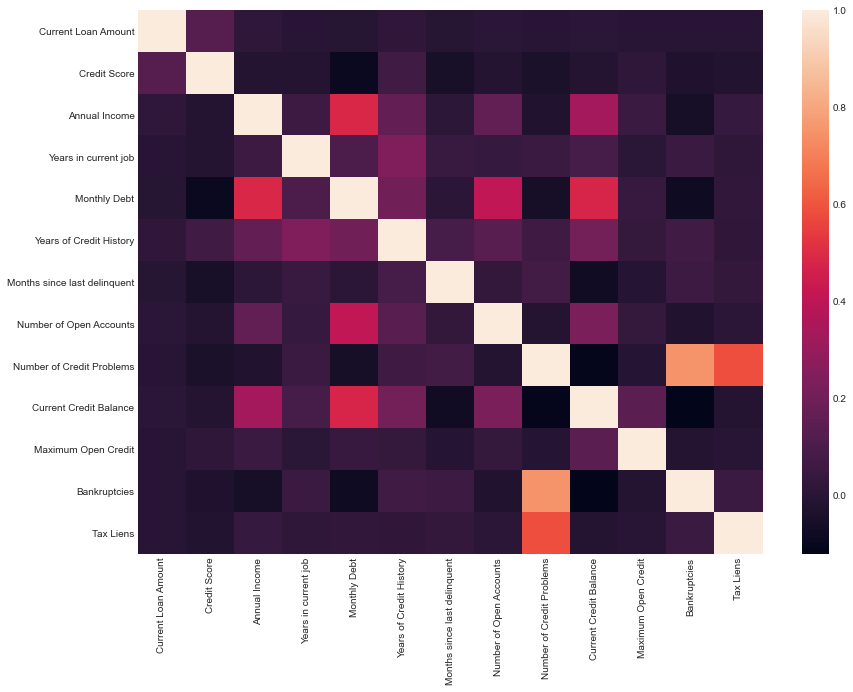

In [154]:
plt.figure(figsize=(14,10))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

### Spearman Rank Correlation .

In [155]:
corr_spear=trans_dataframe.corr(method='spearman')
corr_spear

Current Loan Amount  Credit Score  \
Current Loan Amount                      1.000000     -0.061503   
Credit Score                            -0.061503      1.000000   
Annual Income                            0.418298      0.009240   
Years in current job                     0.072520     -0.013238   
Monthly Debt                             0.336484     -0.094245   
Years of Credit History                  0.144092      0.085013   
Months since last delinquent            -0.015166     -0.090940   
Number of Open Accounts                  0.177367      0.003152   
Number of Credit Problems               -0.072923     -0.059105   
Current Credit Balance                   0.368803     -0.015868   
Maximum Open Credit                      0.358947      0.164311   
Bankruptcies                            -0.078903     -0.042521   
Tax Liens                                0.013075     -0.029503   

                              Annual Income  Years in current job  \
Current Loan Amount                0.418298              0.072520   
Credit Score                       0.009240             -0.013238   
Annual Income                      1.000000              0.111439   
Years in current job               0.111439              1.000000   
Monthly Debt                       0.591385              0.123593   
Years of Credit History            0.257749              0.265999   
Months since last delinquent       0.059897              0.058299   
Number of Open Accounts            0.254445              0.048155   
Number of Credit Problems         -0.051540              0.062857   
Current Credit Balance             0.409414              0.126544   
Maximum Open Credit                0.413957              0.110355   
Bankruptcies                      -0.069783              0.057871   
Tax Liens                          0.038087              0.016205   

                              Monthly Debt  Years of Credit History  \
Current Loan Amount               0.336484                 0.144092   
Credit Score                     -0.094245                 0.085013   
Annual Income                     0.591385                 0.257749   
Years in current job              0.123593                 0.265999   
Monthly Debt                      1.000000                 0.216783   
Years of Credit History           0.216783                 1.000000   
Months since last delinquent      0.038104                 0.138407   
Number of Open Accounts           0.462481                 0.145920   
Number of Credit Problems        -0.066166                 0.080943   
Current Credit Balance            0.526547                 0.265999   
Maximum Open Credit               0.430628                 0.284569   
Bankruptcies                     -0.078216                 0.080574   
Tax Liens                         0.021717                 0.020925   

                              Months since last delinquent  \
Current Loan Amount                              -0.015166   
Credit Score                                     -0.090940   
Annual Income                                     0.059897   
Years in current job                              0.058299   
Monthly Debt                                      0.038104   
Years of Credit History                           0.138407   
Months since last delinquent                      1.000000   
Number of Open Accounts                           0.052195   
Number of Credit Problems                         0.052908   
Current Credit Balance                           -0.114128   
Maximum Open Credit                              -0.121329   
Bankruptcies                                      0.018196   
Tax Liens                                         0.042784   

                              Number of Open Accounts  \
Current Loan Amount                          0.177367   
Credit Score                                 0.003152   
Annual Income                                0.254445   
Years in current job            

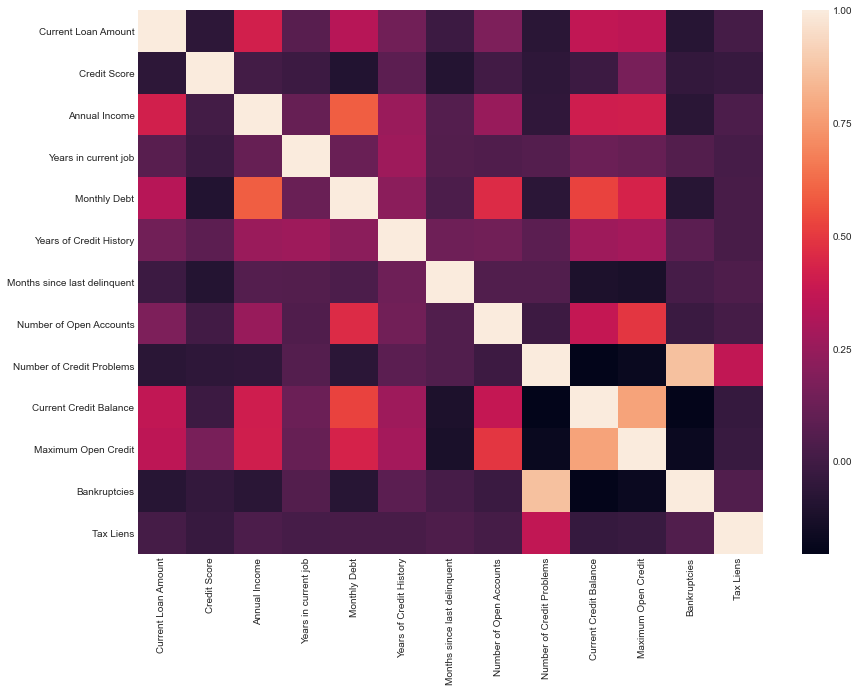

In [168]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_spear,xticklabels=corr_spear.columns.values,yticklabels=corr_spear.columns.values)
plt.show()

Checking Columns with High Correlations .

In [169]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = New_Data.corr().abs()
# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)
# List column names of highly correlated features (r > 0.4)
high_cor = [c for c in tri_df.columns if any(tri_df[c] > 0.4)]
# Drop the features in the to_drop list
#reduced_df = ansur_df.drop(to_drop, axis=1)
#print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))
high_cor

['Annual Income', 'Monthly Debt', 'Number of Credit Problems']

In [170]:
New_Data[high_cor].corr()

Annual Income  Monthly Debt  \
Annual Income                   1.000000      0.490095   
Monthly Debt                    0.490095      1.000000   
Number of Credit Problems      -0.022094     -0.053656   

                           Number of Credit Problems  
Annual Income                              -0.022094  
Monthly Debt                               -0.053656  
Number of Credit Problems                   1.000000

#### Checking Graphically for Highly Correlated Columns.

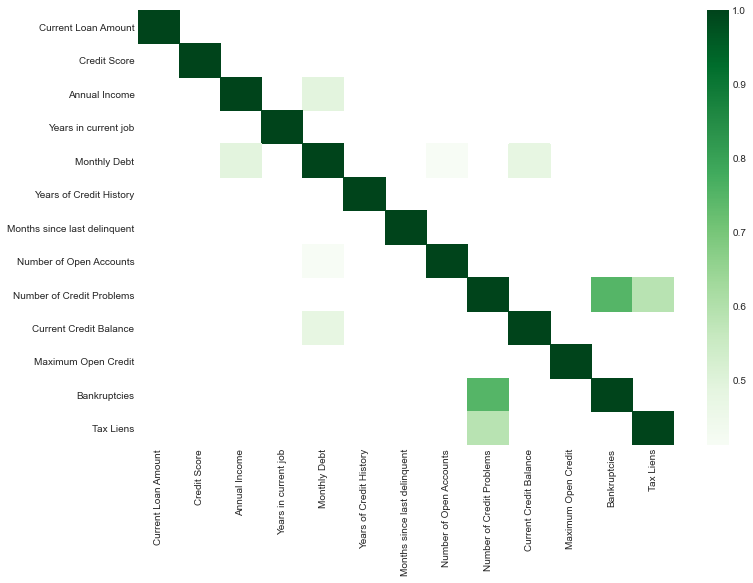

In [171]:
c = New_Data.corr()
kot = corr[corr>=.4]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")
plt.show()

Above Shows correlation for above 0.4 i.e positive correlations but we can have correlations which can have negative values.
We will try a different method where we can include both positive and negative corrleations.

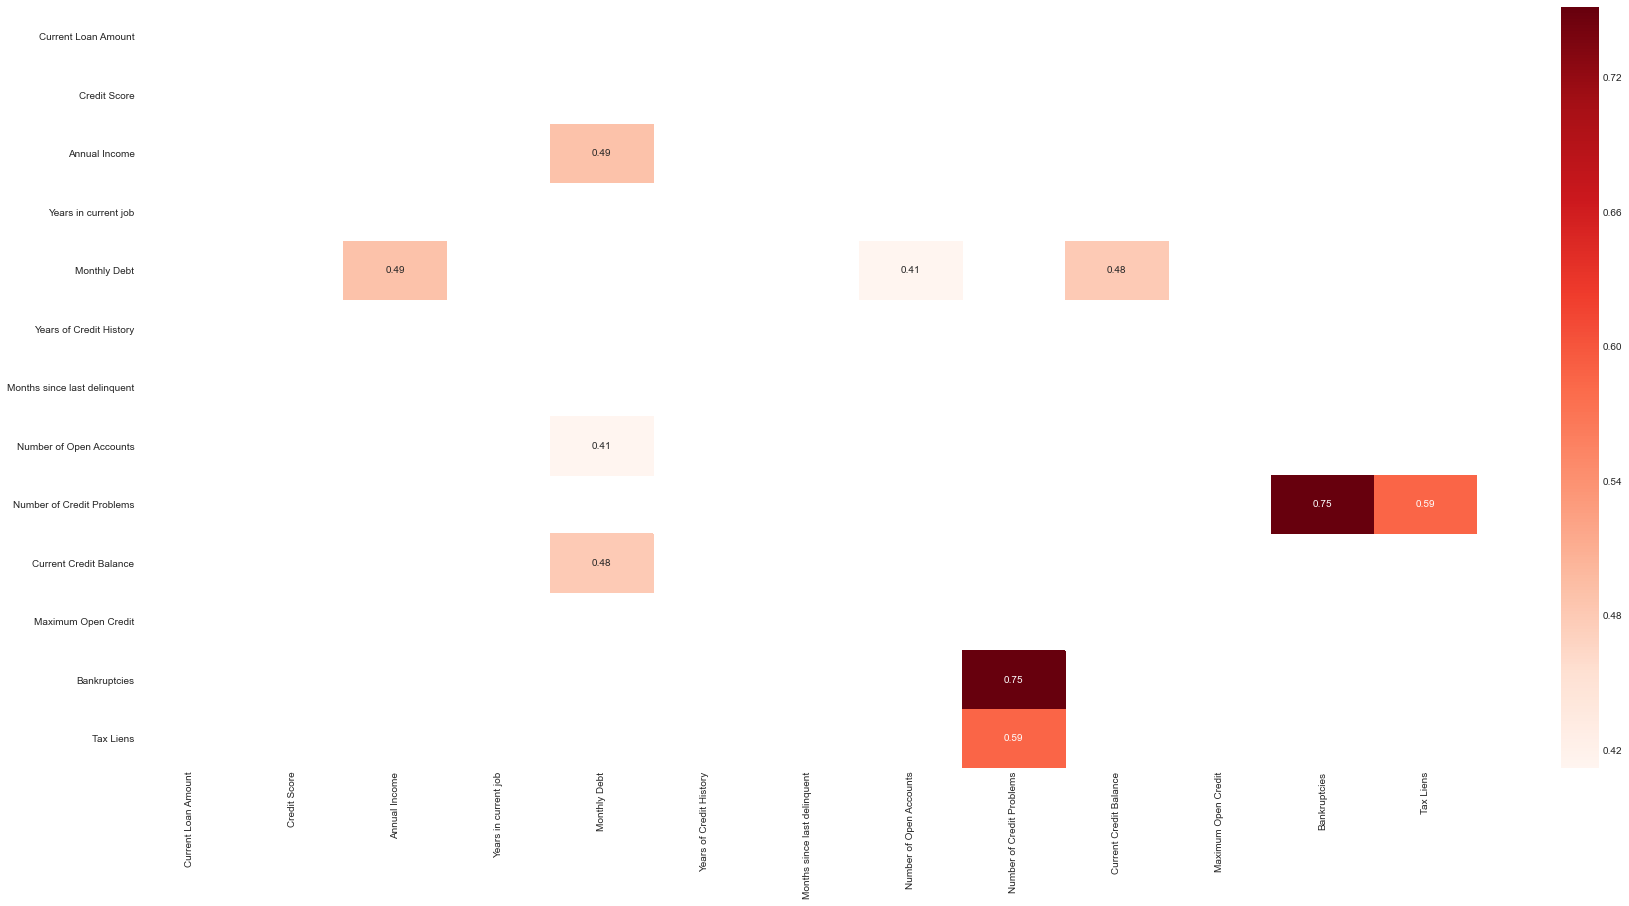

In [174]:
dfCorr = New_Data.corr()
filteredDf = dfCorr[((dfCorr >= .4) | (dfCorr <= -.4)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,14))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

Lets print out the values of correlation 

In [191]:
dfCorr_abs = New_Data.corr().abs()
s=dfCorr_abs.unstack()
so=s.sort_values(kind="quicksort",ascending=False)
type(so)
#print(so.iloc[13:])
so.iloc[13:36]

Number of Credit Problems  Bankruptcies                 0.751366
Bankruptcies               Number of Credit Problems    0.751366
Number of Credit Problems  Tax Liens                    0.586939
Tax Liens                  Number of Credit Problems    0.586939
Monthly Debt               Annual Income                0.490095
Annual Income              Monthly Debt                 0.490095
Current Credit Balance     Monthly Debt                 0.480003
Monthly Debt               Current Credit Balance       0.480003
Number of Open Accounts    Monthly Debt                 0.411969
Monthly Debt               Number of Open Accounts      0.411969
Current Credit Balance     Annual Income                0.329698
Annual Income              Current Credit Balance       0.329698
Years of Credit History    Years in current job         0.240717
Years in current job       Years of Credit History      0.240717
Current Credit Balance     Number of Open Accounts      0.226929
Number of Open Accounts  

From the above visualizations and numeric displays it is clear that 'Number of Credit Problems' is higly correlated with Bankruptcies & Tax Liens.
Before taking decison on whether wew can drop any of the columns lets check the data distribution once.


###### Number of Credit Problems

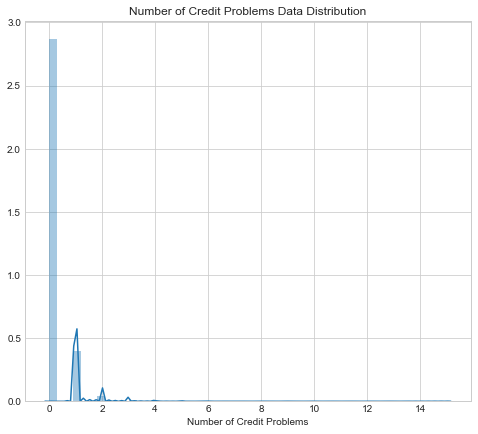

In [192]:
plt.figure(figsize=(8,7))
sns.distplot(data['Number of Credit Problems'])
plt.title ('Number of Credit Problems Data Distribution')
plt.show()

In [199]:
New_Data['Number of Credit Problems'].unique()

array([ 1.,  0.,  2.,  5.,  4.,  3.,  7.,  6., 11., 15., 10.,  8.,  9.,
       12.])

In [200]:
New_Data['Number of Credit Problems'].describe()

count    110000.000000
mean          0.168055
std           0.484389
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: Number of Credit Problems, dtype: float64

##### Bankruptcies

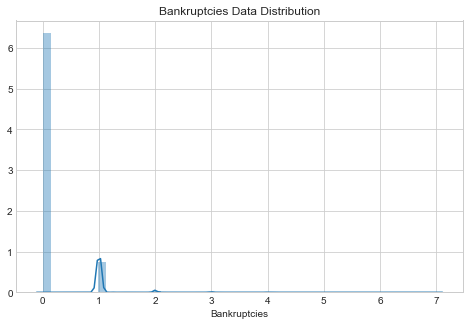

In [203]:
plt.figure(figsize=(8,5))
sns.distplot(New_Data['Bankruptcies'])
plt.title ('Bankruptcies Data Distribution')
plt.show()

In [201]:
New_Data['Bankruptcies'].unique()

array([1. , 0. , 2. , 3. , 0.2, 5. , 4. , 0.4, 0.6, 7. , 6. , 1.2, 0.8])

In [202]:
New_Data['Bankruptcies'].describe()

count    110000.000000
mean          0.117591
std           0.351053
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: Bankruptcies, dtype: float64

In [204]:
New_Data['Bankruptcies'].value_counts()

0.0    97828
1.0    11498
2.0      463
3.0      107
0.2       36
4.0       27
0.4       18
0.6        9
5.0        8
6.0        2
1.2        2
7.0        1
0.8        1
Name: Bankruptcies, dtype: int64

Above bankruptcy data shows some decimal values which doesnt look possible, might be because of KNNImputation missing values would have been filled with some aggreegates which resulted in decimal values.
We will tackle this by rounding the values to the nearest integer.

In [205]:
Bankr=[round(i) for i in New_Data['Bankruptcies'] ]

In [206]:
New_Data['Bankruptcies']=Bankr

In [222]:
##saving the current file.

New_Data.to_csv('D:\\iNeuron\\intership_2\\credit_ver8.csv',index=False)

In [207]:
New_Data['Bankruptcies'].value_counts()

0    97882
1    11510
2      463
3      107
4       27
5        8
6        2
7        1
Name: Bankruptcies, dtype: int64

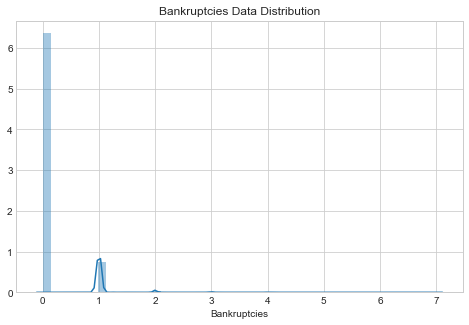

In [209]:
plt.figure(figsize=(8,5))
sns.distplot(New_Data['Bankruptcies'])
plt.title ('Bankruptcies Data Distribution')
plt.show()

Now all bankrupty data is integers , as of now we are going with the same values but later can be a situation where there is a confirmation from business that bankruptcy can have binary values i.e. either bankrupt or not i.e. 0 or 1.

### Chi Square Test 

#### Home Ownership v/s Loan Status 

In [211]:
New_Data.select_dtypes(exclude=np.number).columns.to_list()

['Loan Status', 'Term', 'Home Ownership', 'Purpose']

In [212]:
#Creating contigency table
data_crosstab=pd.crosstab(New_Data['Home Ownership'],New_Data['Loan Status'])

In [213]:
data_crosstab

Loan Status     Charged Off  Fully Paid
Home Ownership                         
Home Mortgage         11068       42439
Own Home               2315        7781
Rent                  11563       34834

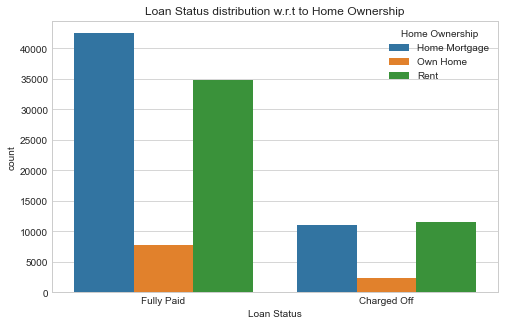

In [215]:
#First checking in bar plot, then will go chi square test
plt.figure(figsize=(8,5))
sns.countplot(New_Data['Loan Status'],hue=New_Data['Home Ownership'])
plt.title('Loan Status distribution w.r.t to Home Ownership')
plt.show()

Looks like Rented people default marginally more than HomeMortgage.


In [219]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(stat)
print('p value =',p)
print(expected)

dof=2
254.7728752075058
p value = 4.750869262397744e-56
[[12134.41474545 41372.58525455]
 [ 2289.58923636  7806.41076364]
 [10521.99601818 35875.00398182]]


In [220]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=5.991, stat=254.773


In [221]:
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


Above shows there is a correlation between Loan status and HomeOwnership .

#### Purpose v/s Loan Status 

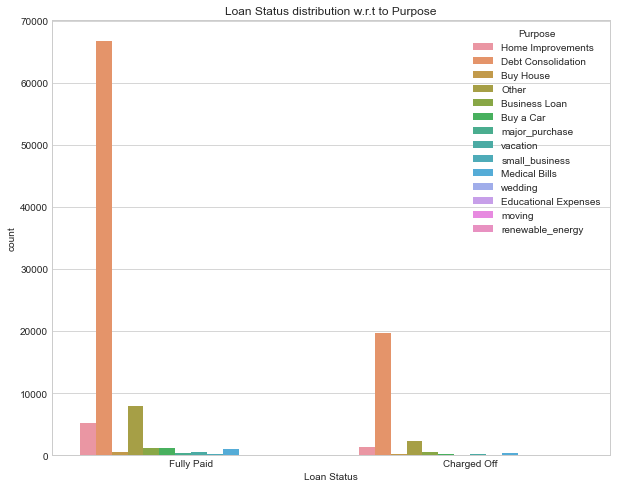

In [235]:
#First checking in bar plot, then will go chi square test
plt.figure(figsize=(10,8))
sns.countplot(New_Data['Loan Status'],hue=New_Data['Purpose'])
plt.title('Loan Status distribution w.r.t to Purpose')
plt.show()

Above doesnt give much info but most of the loans are for debt conslolidation .

In [225]:
purpose_crosstab=pd.crosstab(New_Data['Purpose'],New_Data['Loan Status'])
purpose_crosstab

Loan Status           Charged Off  Fully Paid
Purpose                                      
Business Loan                 525        1207
Buy House                     156         592
Buy a Car                     237        1170
Debt Consolidation          19720       66710
Educational Expenses           19          94
Home Improvements            1300        5132
Medical Bills                 301         939
Other                        2237        7919
major_purchase                 93         311
moving                         45         119
renewable_energy                5           6
small_business                127         187
vacation                      157         567
wedding                        24         101

In [226]:
stat, p, dof, expected = chi2_contingency(purpose_crosstab)
print('dof=%d' % dof)
print(stat)
print('p value =',p)
print(expected)

dof=13
179.21800953339405
p value = 2.4501812509707327e-31
[[3.92786109e+02 1.33921389e+03]
 [1.69632800e+02 5.78367200e+02]
 [3.19082018e+02 1.08791798e+03]
 [1.96007525e+04 6.68292475e+04]
 [2.56263455e+01 8.73736545e+01]
 [1.45866065e+03 4.97333935e+03]
 [2.81209455e+02 9.58790545e+02]
 [2.30319615e+03 7.85280385e+03]
 [9.16198545e+01 3.12380145e+02]
 [3.71922182e+01 1.26807782e+02]
 [2.49460000e+00 8.50540000e+00]
 [7.12094909e+01 2.42790509e+02]
 [1.64190036e+02 5.59809964e+02]
 [2.83477273e+01 9.66522727e+01]]


In [227]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=22.362, stat=179.218


In [228]:
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


Above shows there is a correlation between Loan status and Purpose .

#### Term v/s Loan Status 

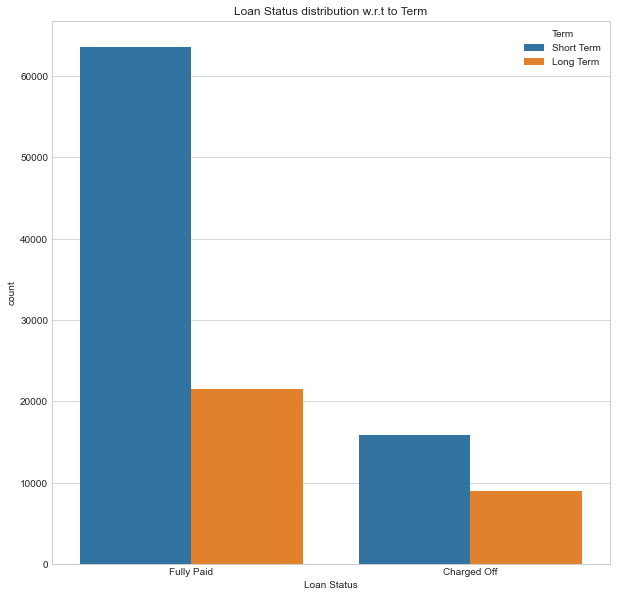

In [229]:
#First checking in bar plot, then will go chi square test
plt.figure(figsize=(10,10))
sns.countplot(New_Data['Loan Status'],hue=New_Data['Term'])
plt.title('Loan Status distribution w.r.t to Term')
plt.show()

In [230]:
Term_crosstab=pd.crosstab(New_Data['Term'],New_Data['Loan Status'])
Term_crosstab

Loan Status  Charged Off  Fully Paid
Term                                
Long Term           9021       21476
Short Term         15925       63578

In [231]:
stat, p, dof, expected = chi2_contingency(Term_crosstab)
print('dof=%d' % dof)
print(stat)
print('p value =',p)
print(expected)

dof=1
1145.7014696246358
p value = 3.855786713886794e-251
[[ 6916.16510909 23580.83489091]
 [18029.83489091 61473.16510909]]


In [232]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=3.841, stat=1145.701


In [233]:
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


Above shows there is a correlation between Loan status and Term .

### Basic Data Exploration using profiling libraries 

#### SweetViz

SweetViz needs target columns to be numeric , we will create a column with 1 as Defaulter or Chargedoff and 0 as FullyPaid column.

In [243]:
New_Data.replace({'Loan Status':{'Fully Paid':1,'Charged Off':0}},inplace=True)

In [244]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Bankruptcies                  110000 non-null  int64  
 12  Tax Liens                     110000 non-nul

                                             |                                             | [  0%]   00:00 ->…


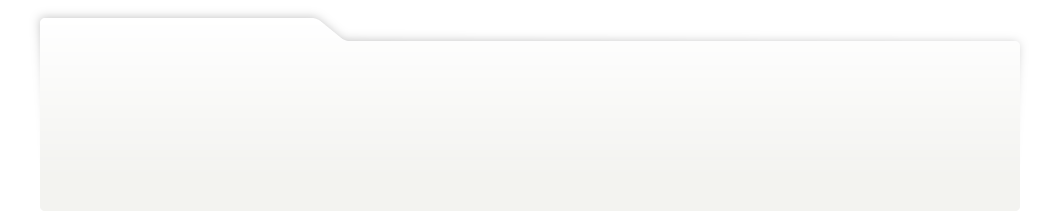
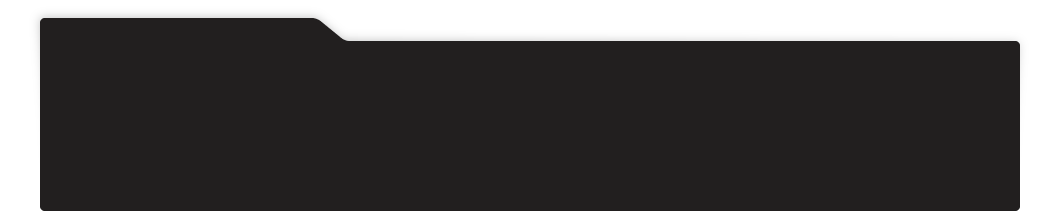
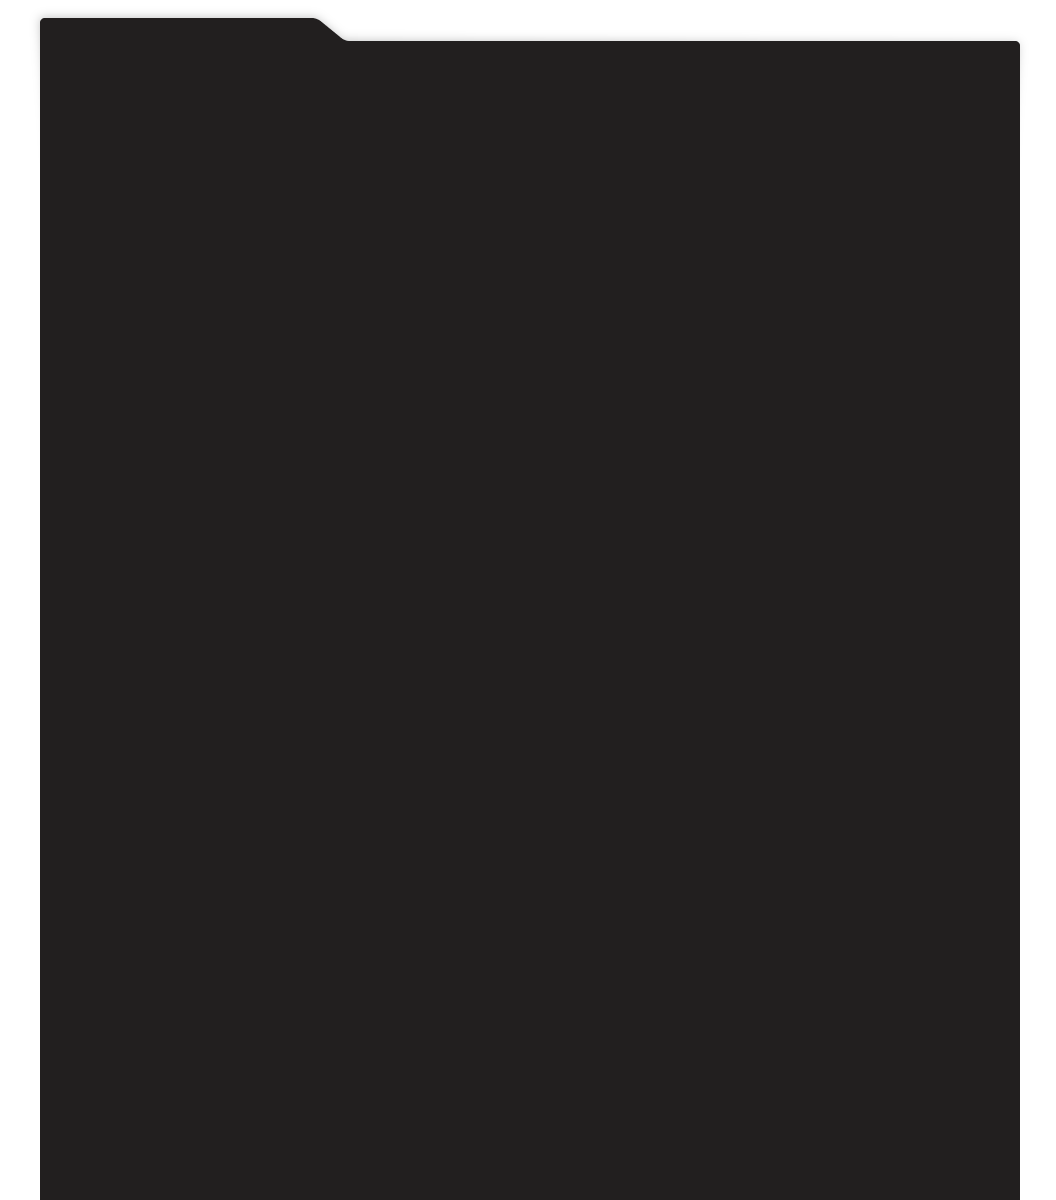
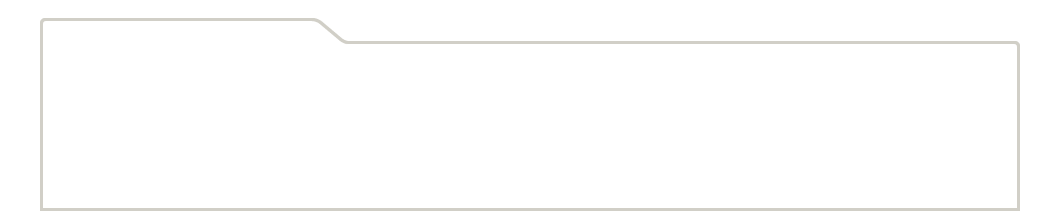
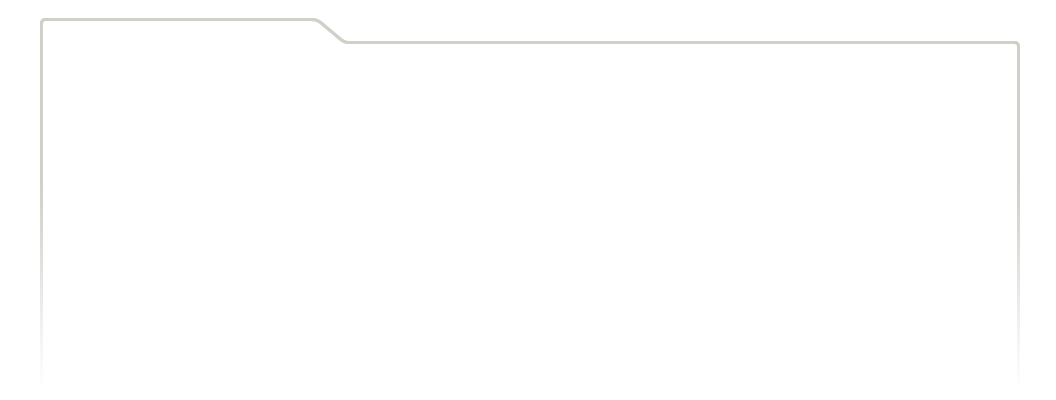
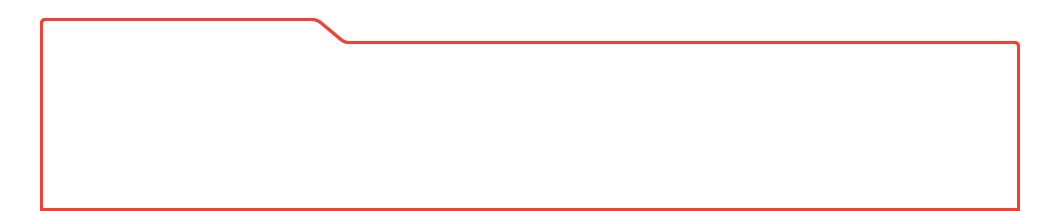
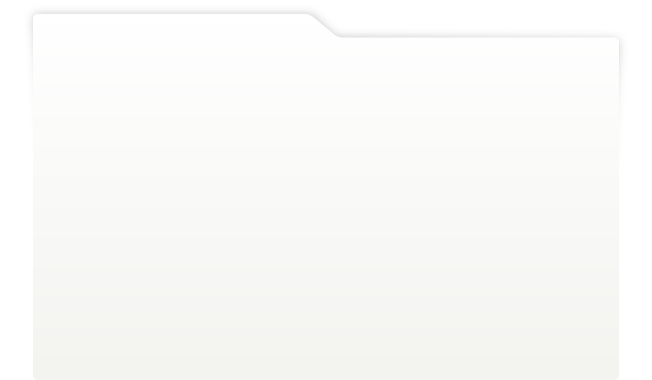
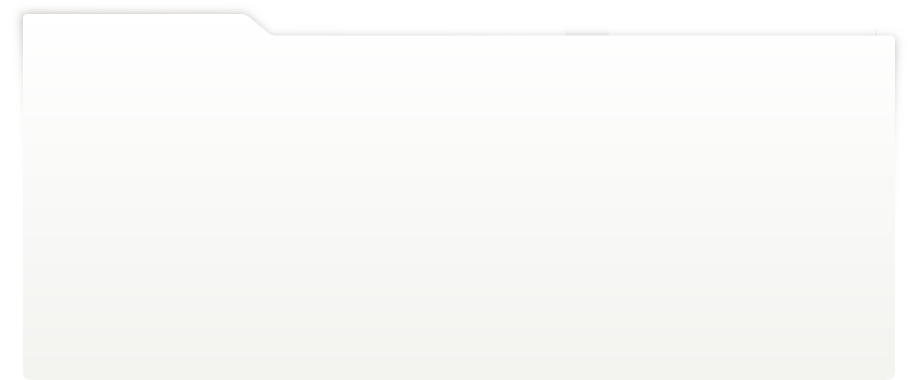
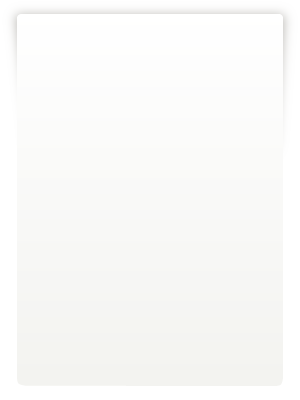
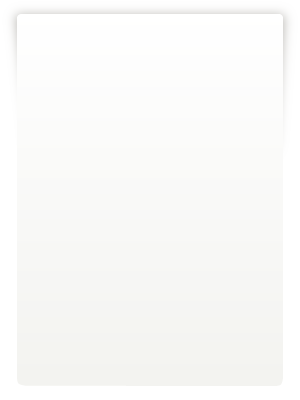
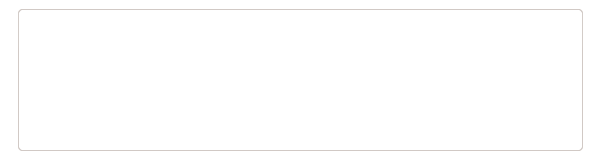
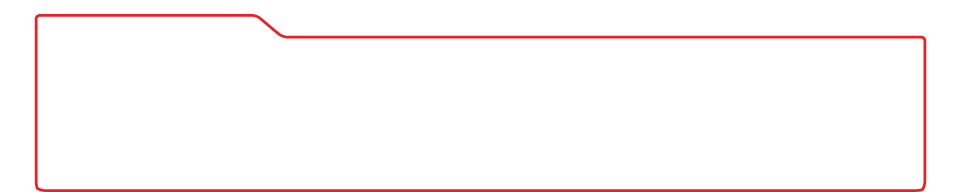
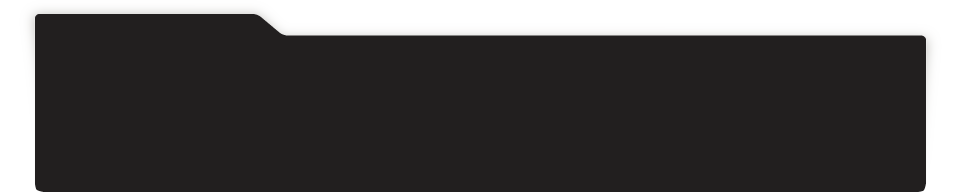
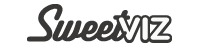
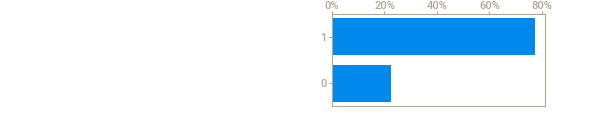
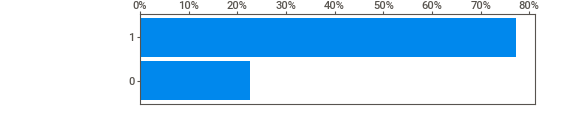
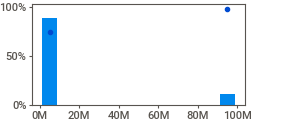
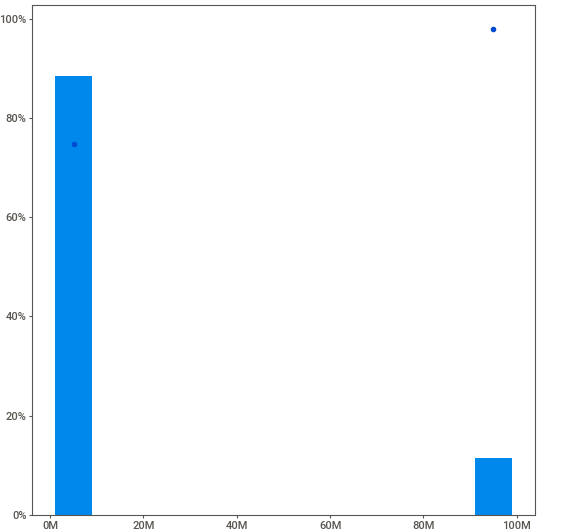
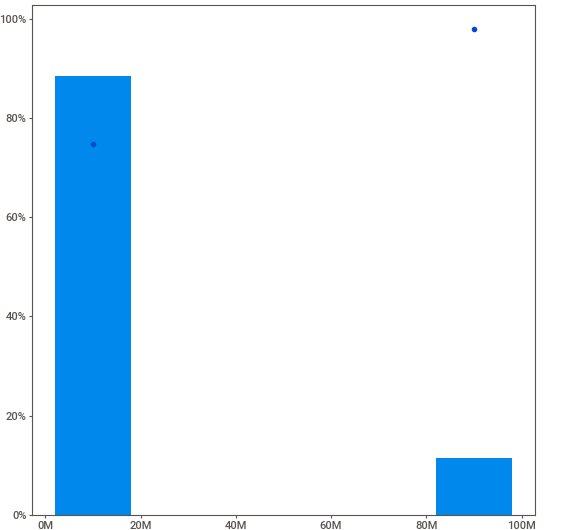
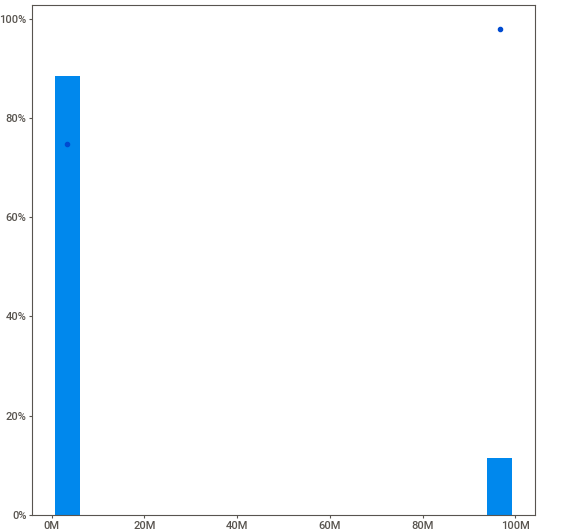
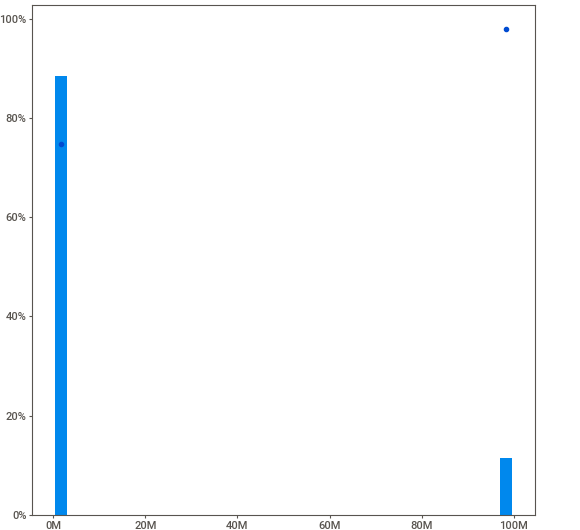
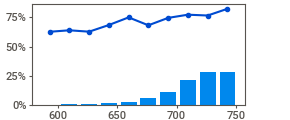
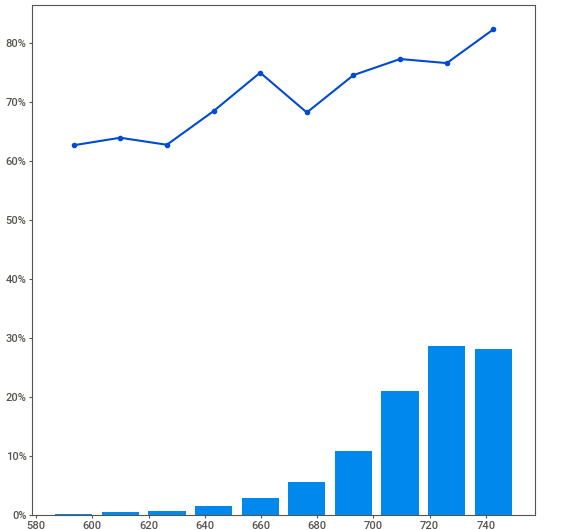
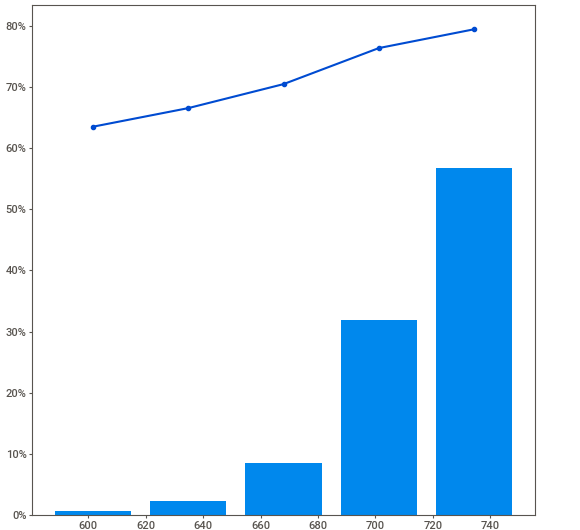
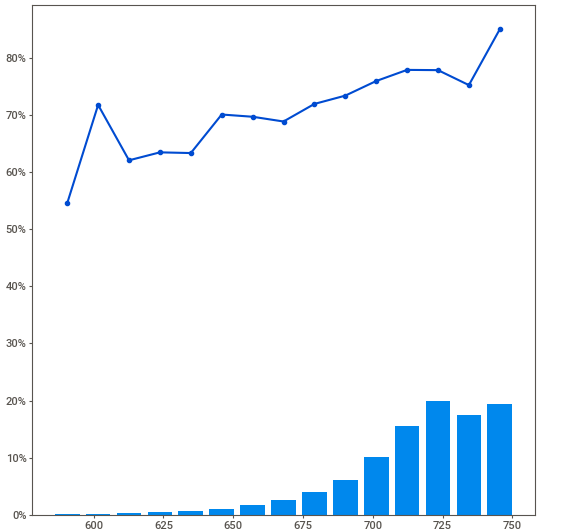
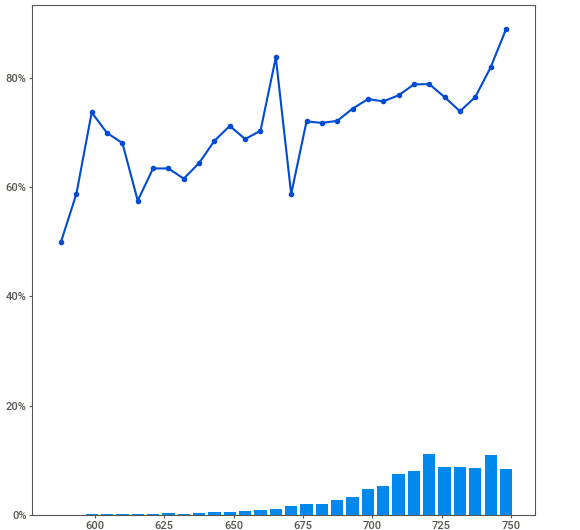
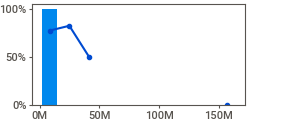
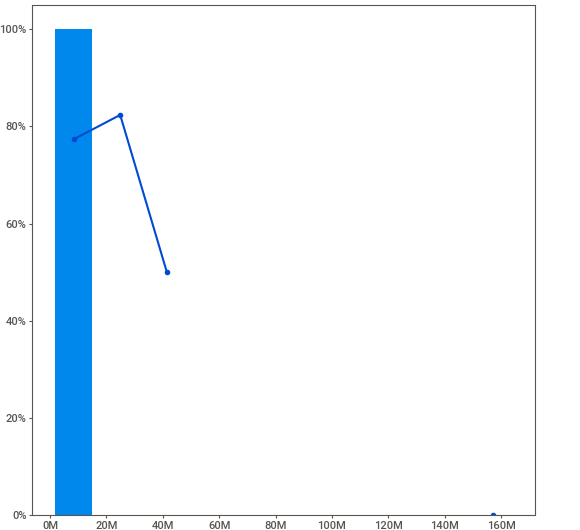
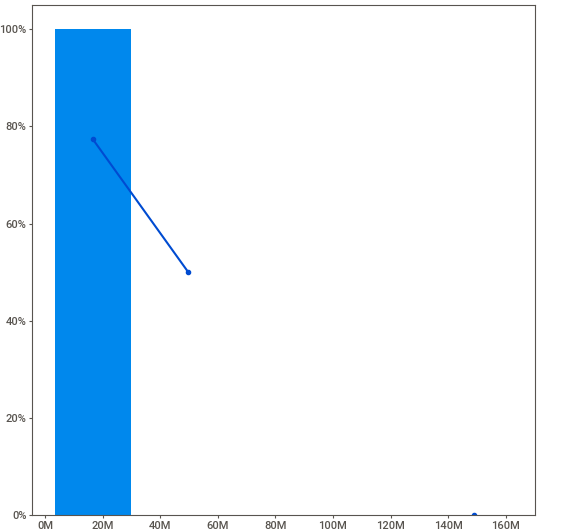
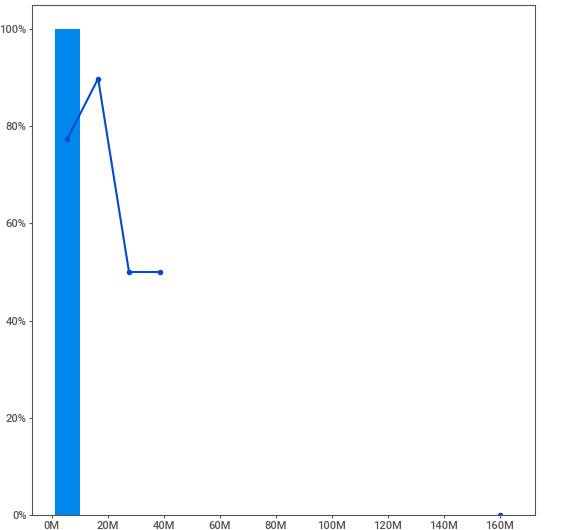
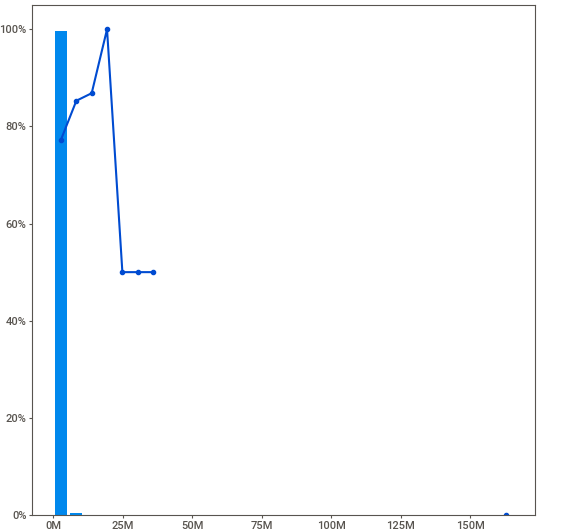
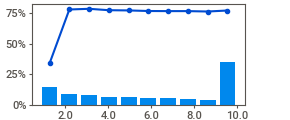
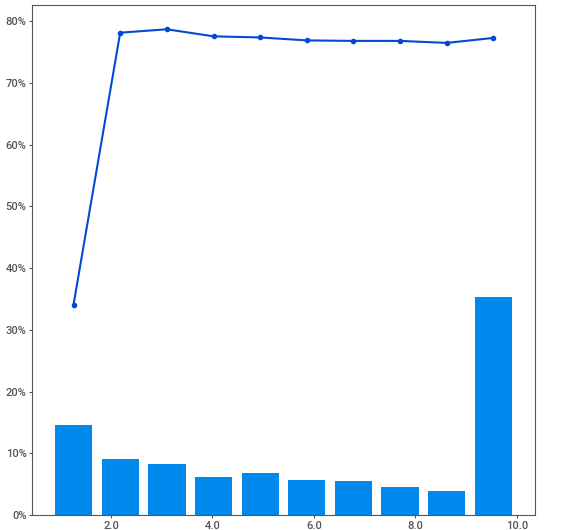
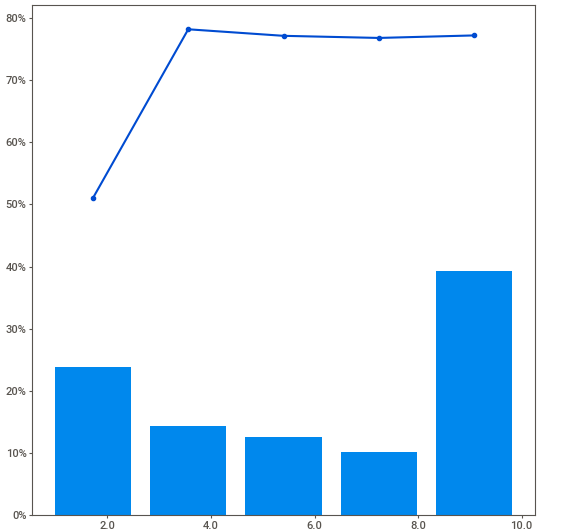
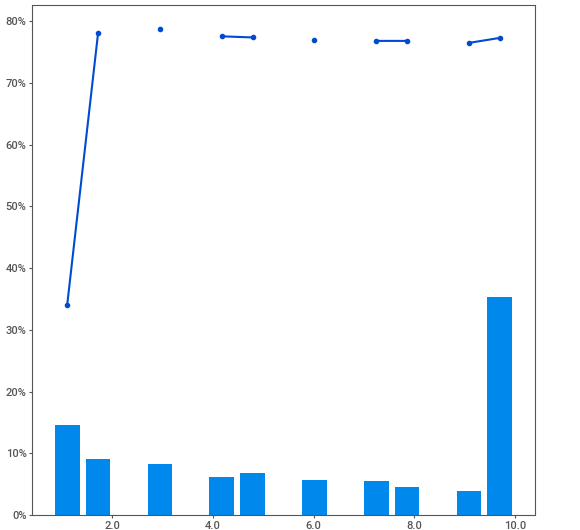
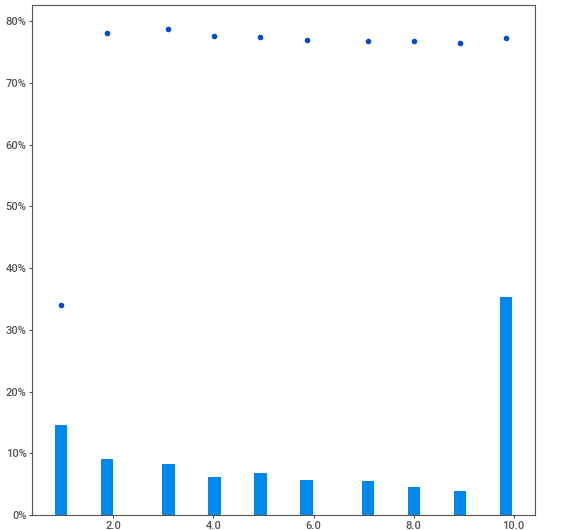
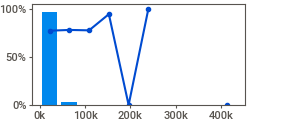
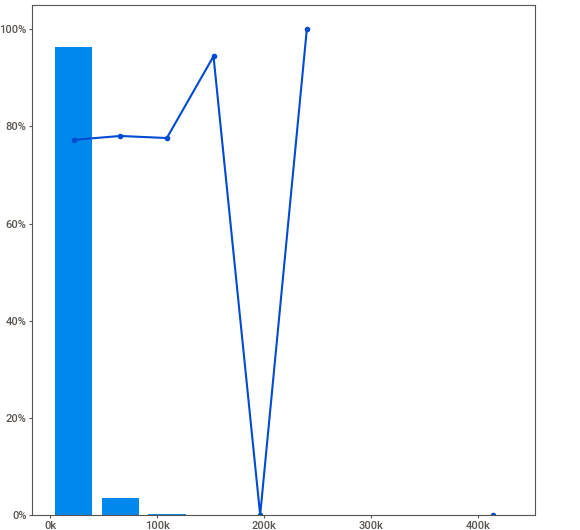
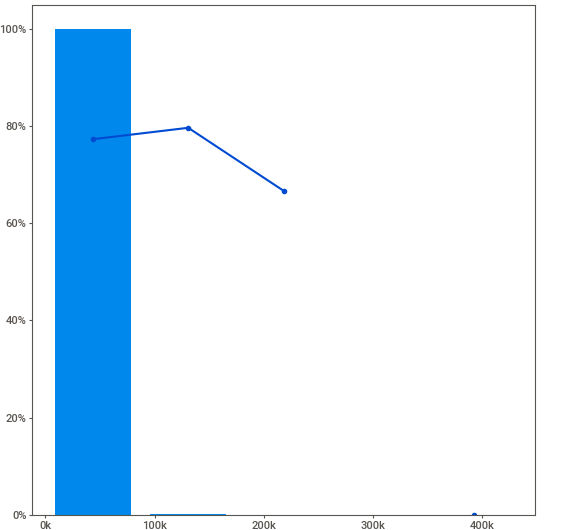
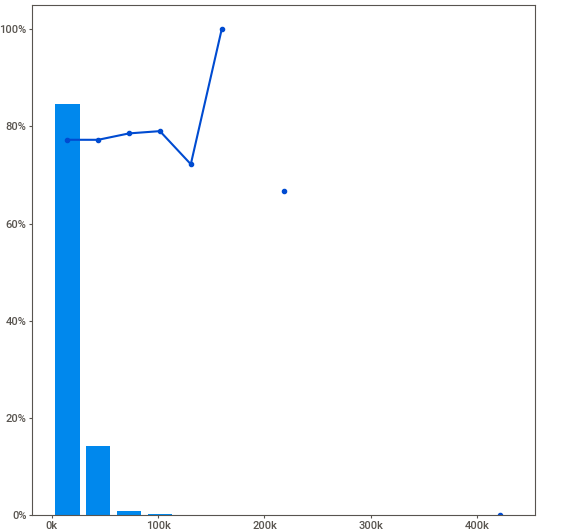
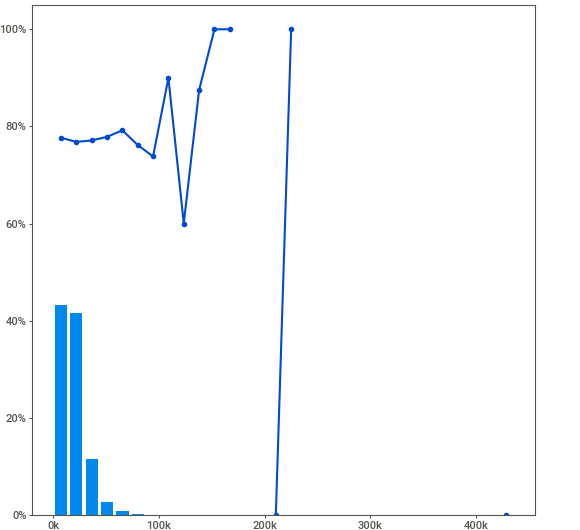
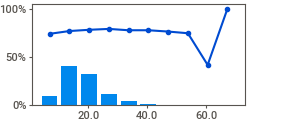
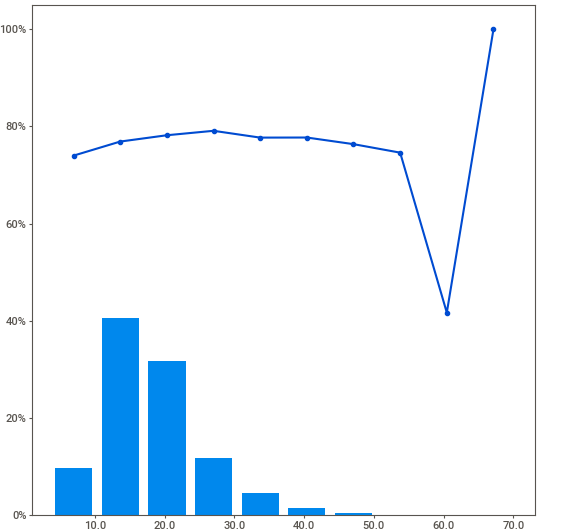
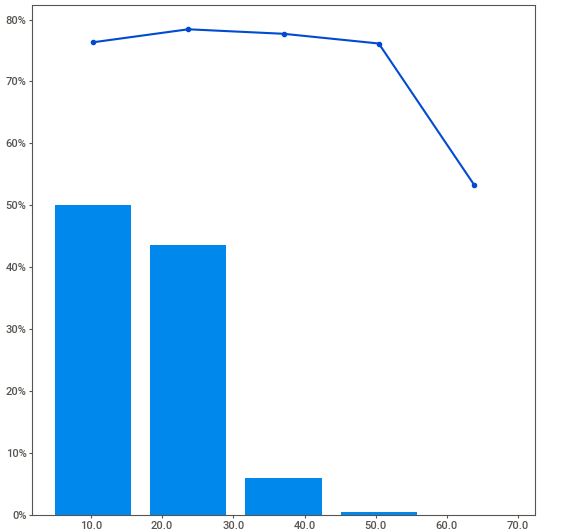
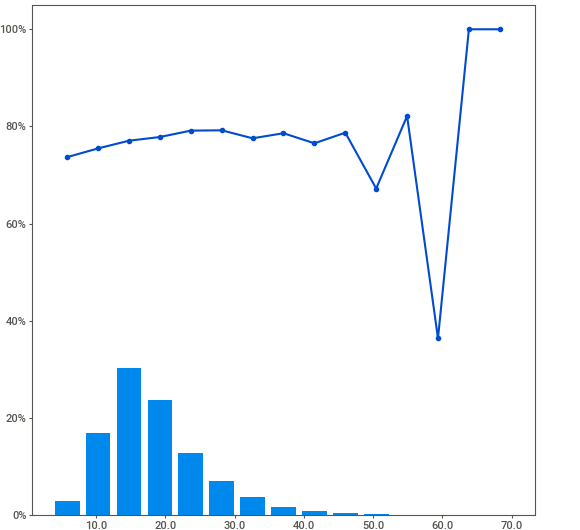
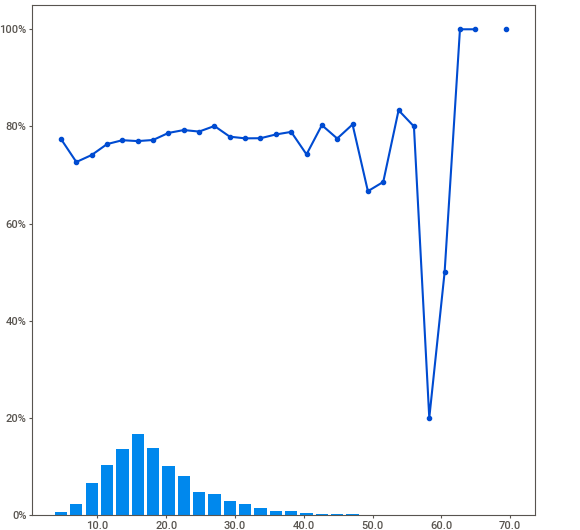
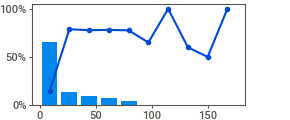
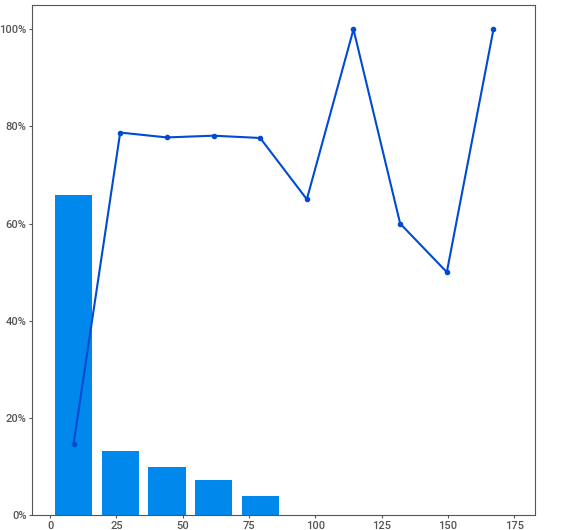
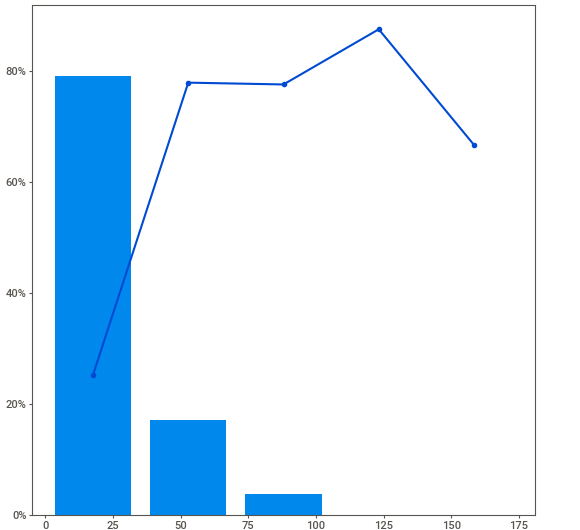
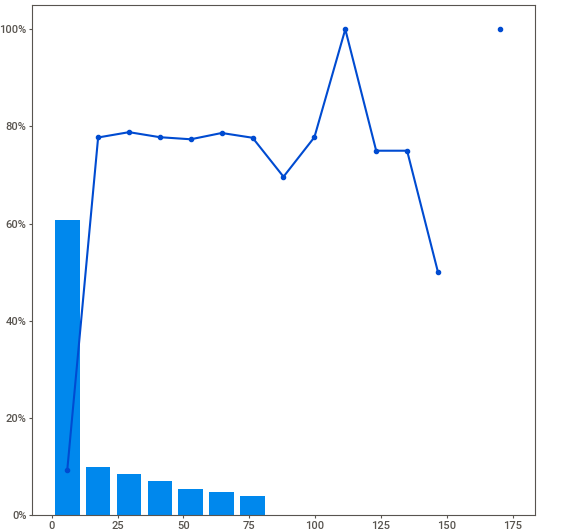
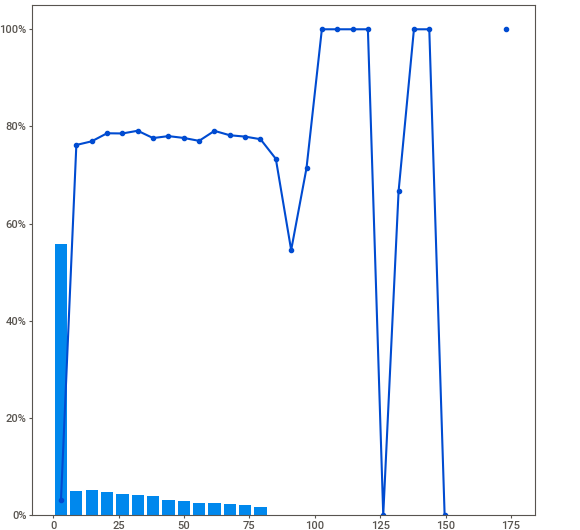
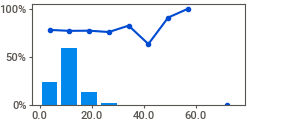
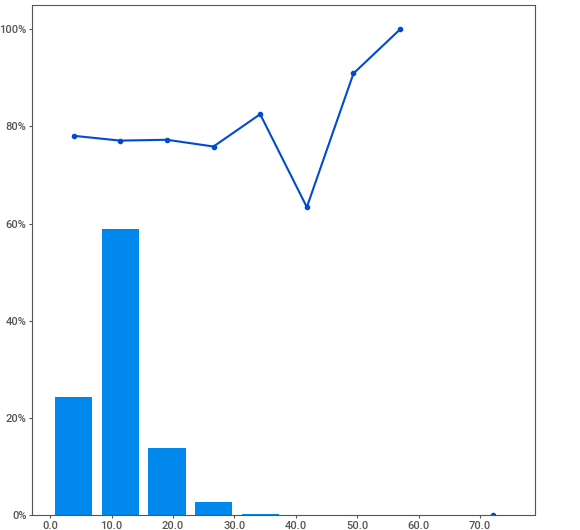
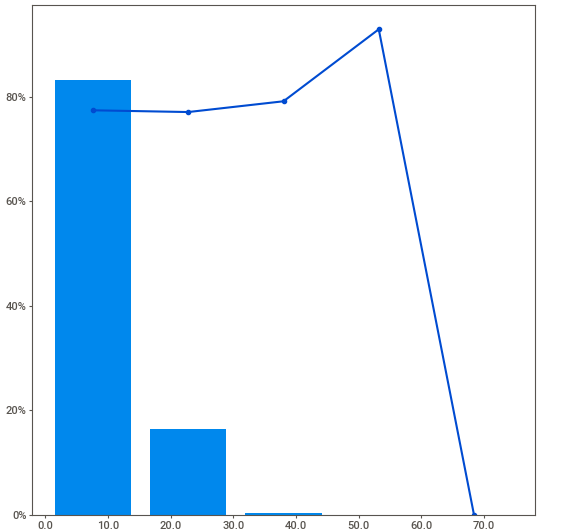
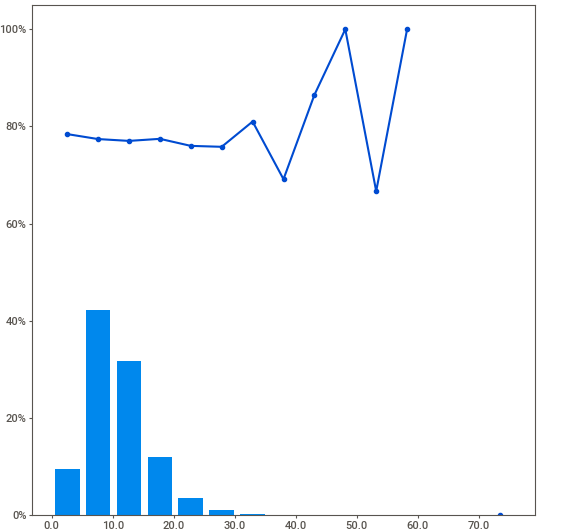
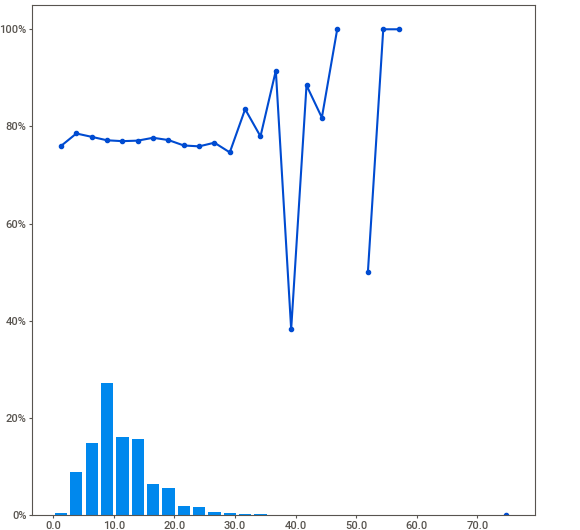
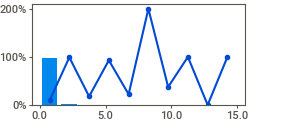
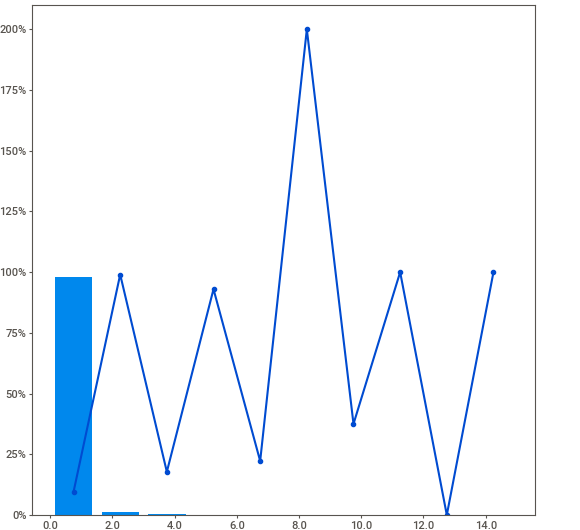
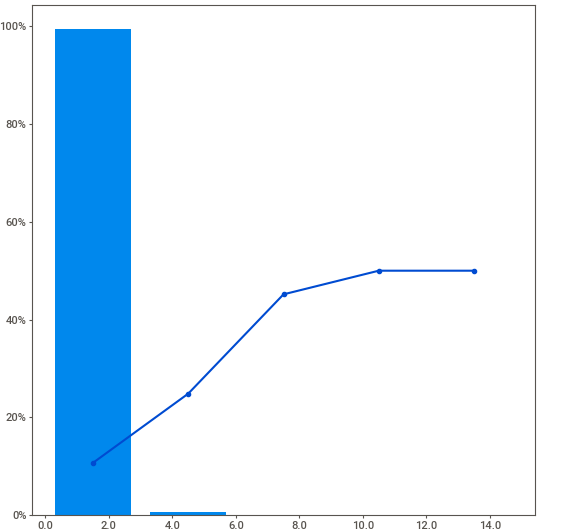
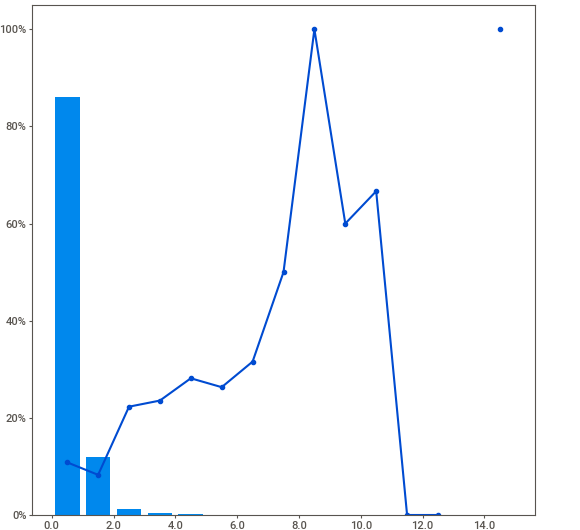
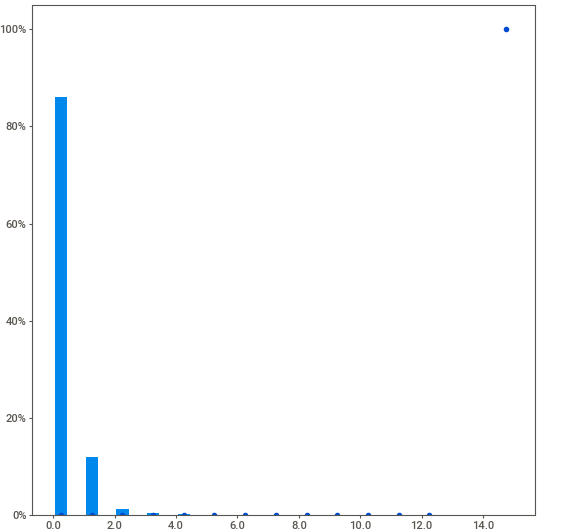
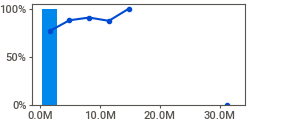
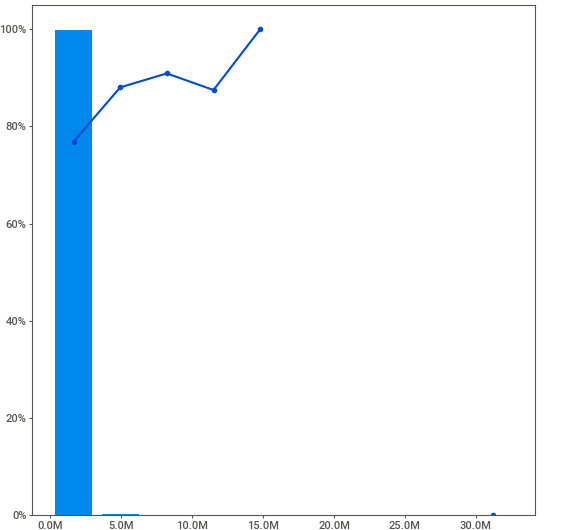
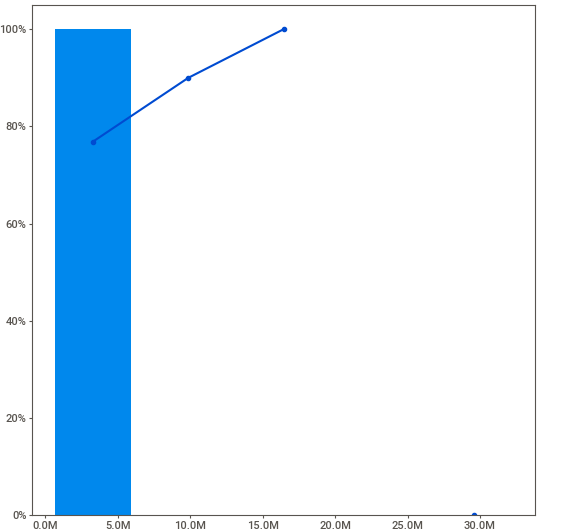
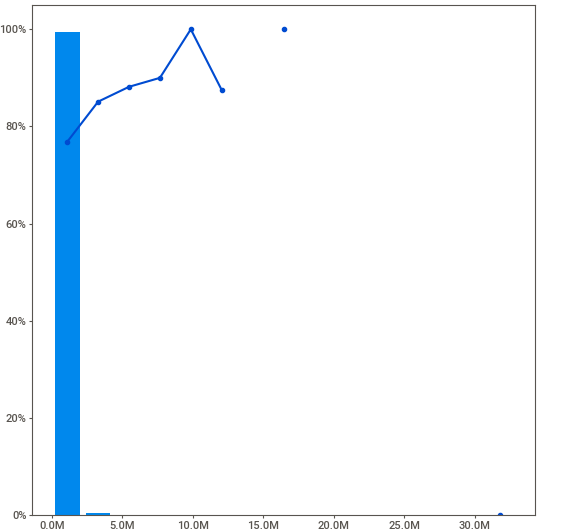
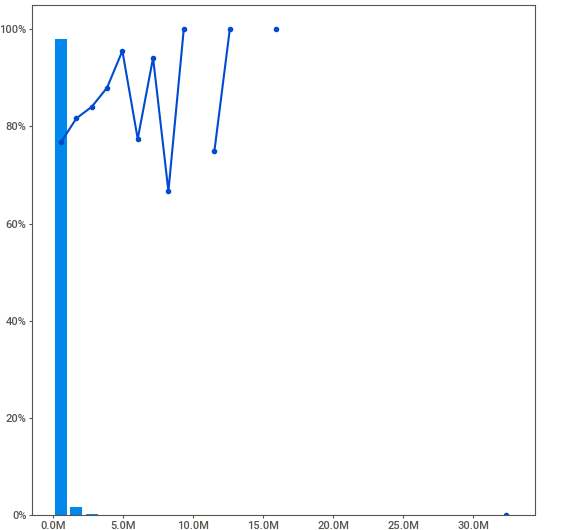
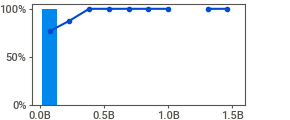
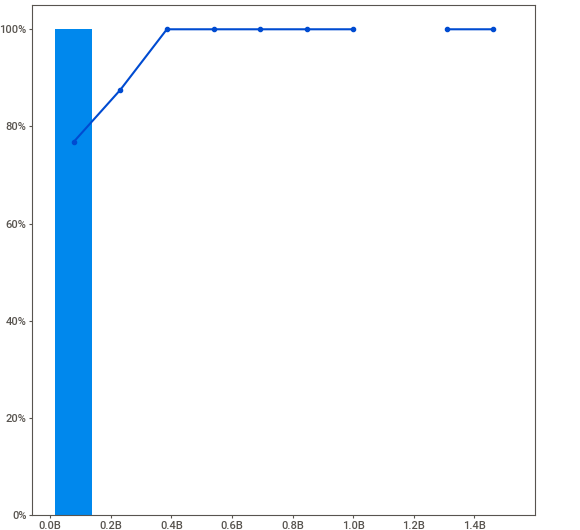
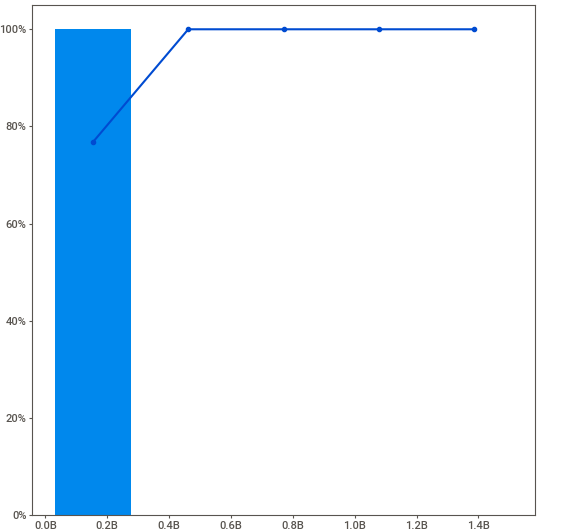
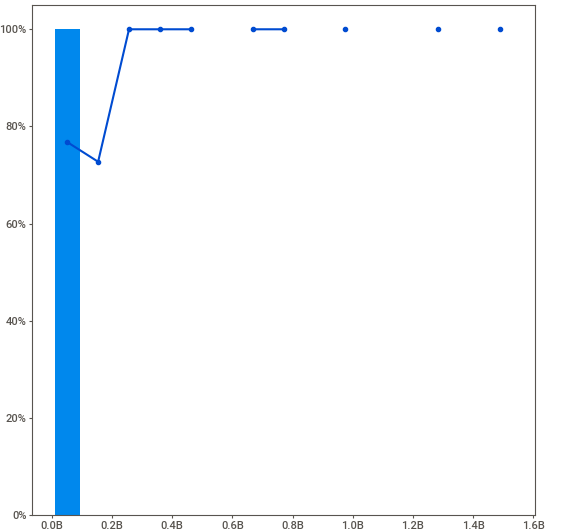
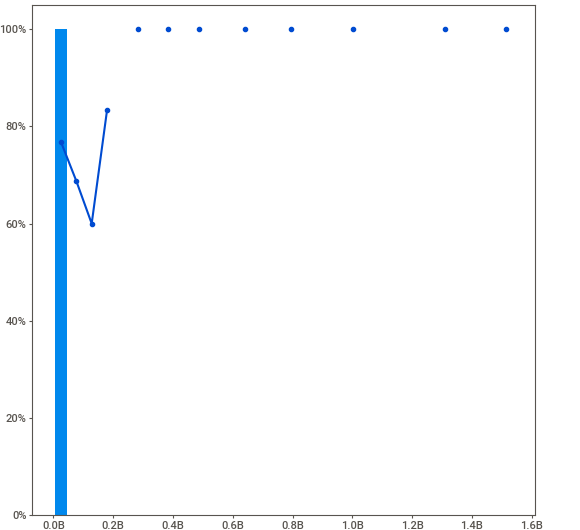
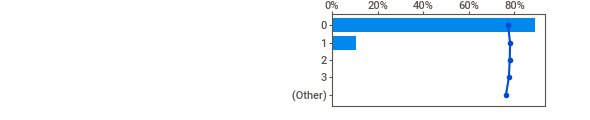
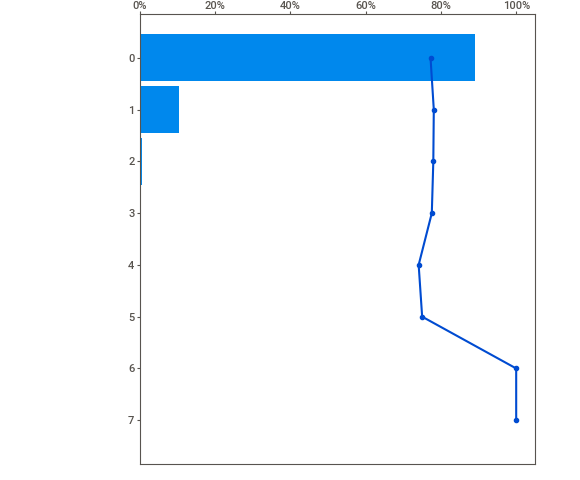
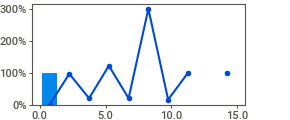
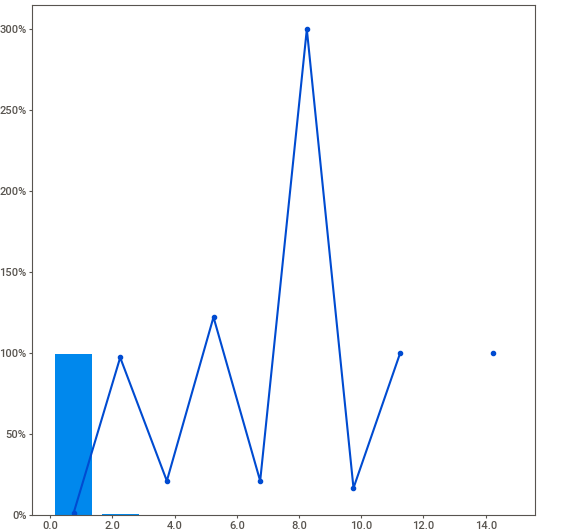
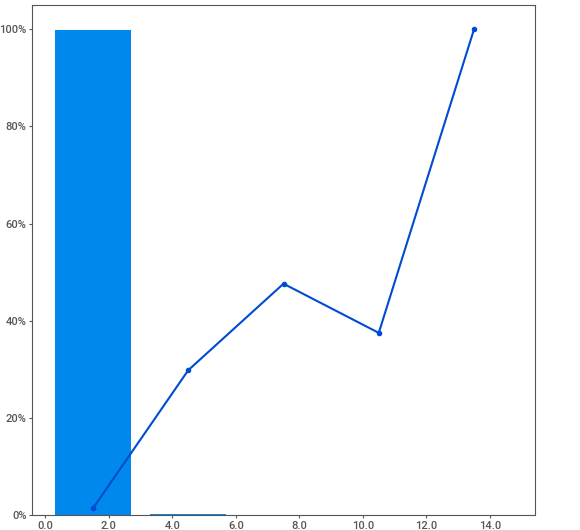
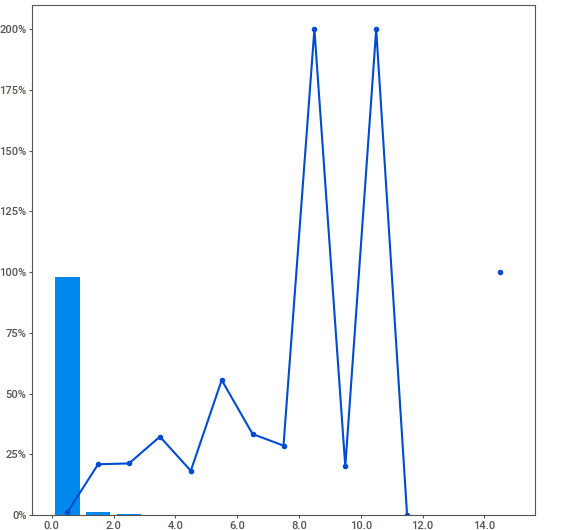
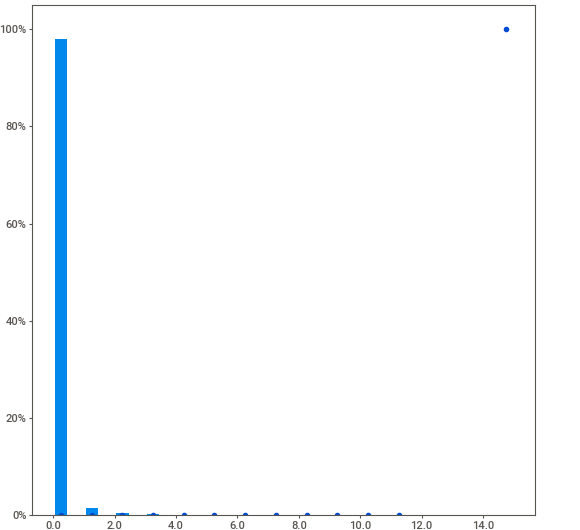
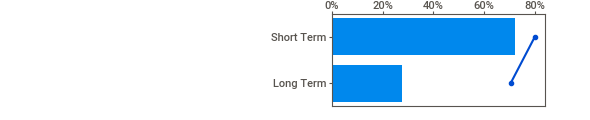
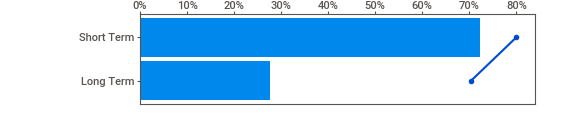
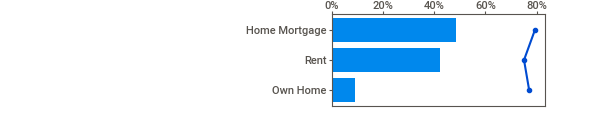
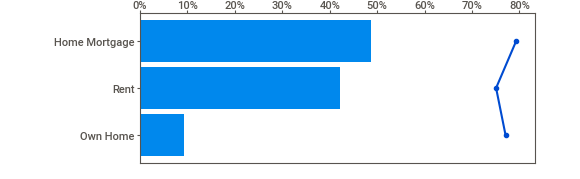
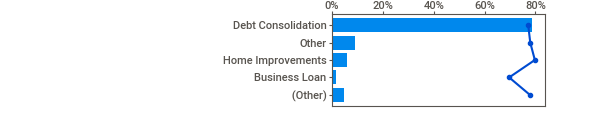
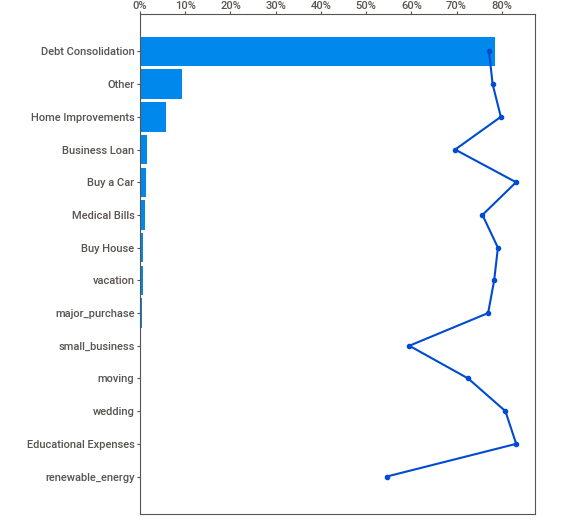
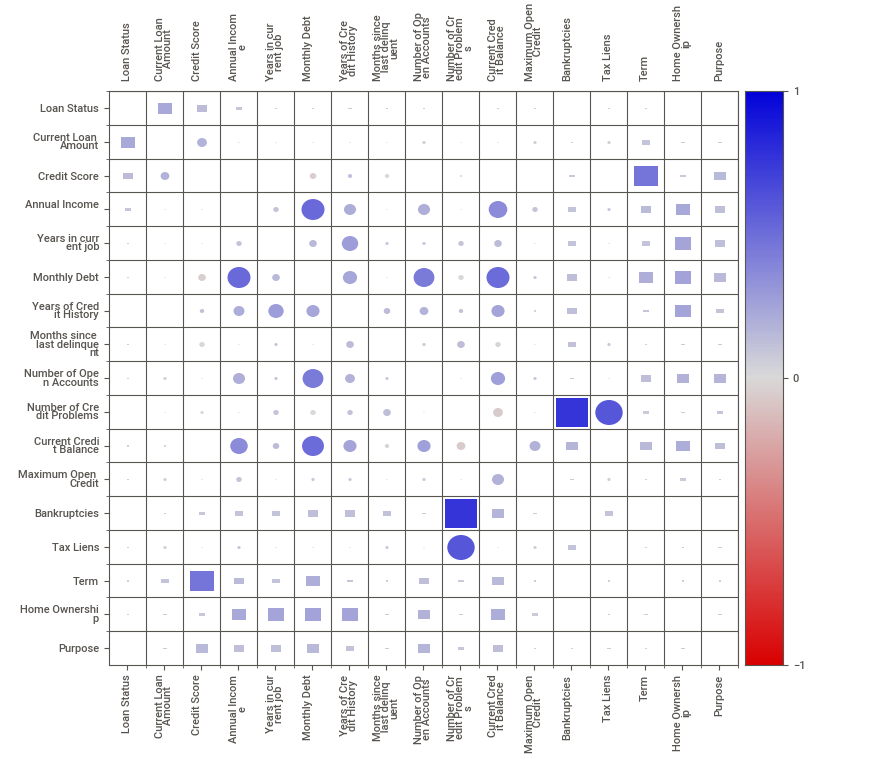
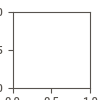

In [245]:
#Running sweetviz 
loan_report=sv.analyze(New_Data,target_feat='Loan Status')
loan_report.show_notebook()

In [246]:
loan_report.show_html(filepath='D:\iNeuron\intership_2\SWEETVIZ_REPORT_CREDIT_DATA.html')

Report D:\iNeuron\intership_2\SWEETVIZ_REPORT_CREDIT_DATA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### AutoViz

In [247]:
###Running AutoViz
loan_av=AutoViz_Class()

Shape of your Data Set: (110000, 17)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    16 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification VISUALIZATION Started #####################
Data Set Shape: 110000 rows, 17 cols
Data Set columns info:
* Current Loan Amount: 0 nulls, 22502 unique vals, most common: {99999999.0: 12617, 2233

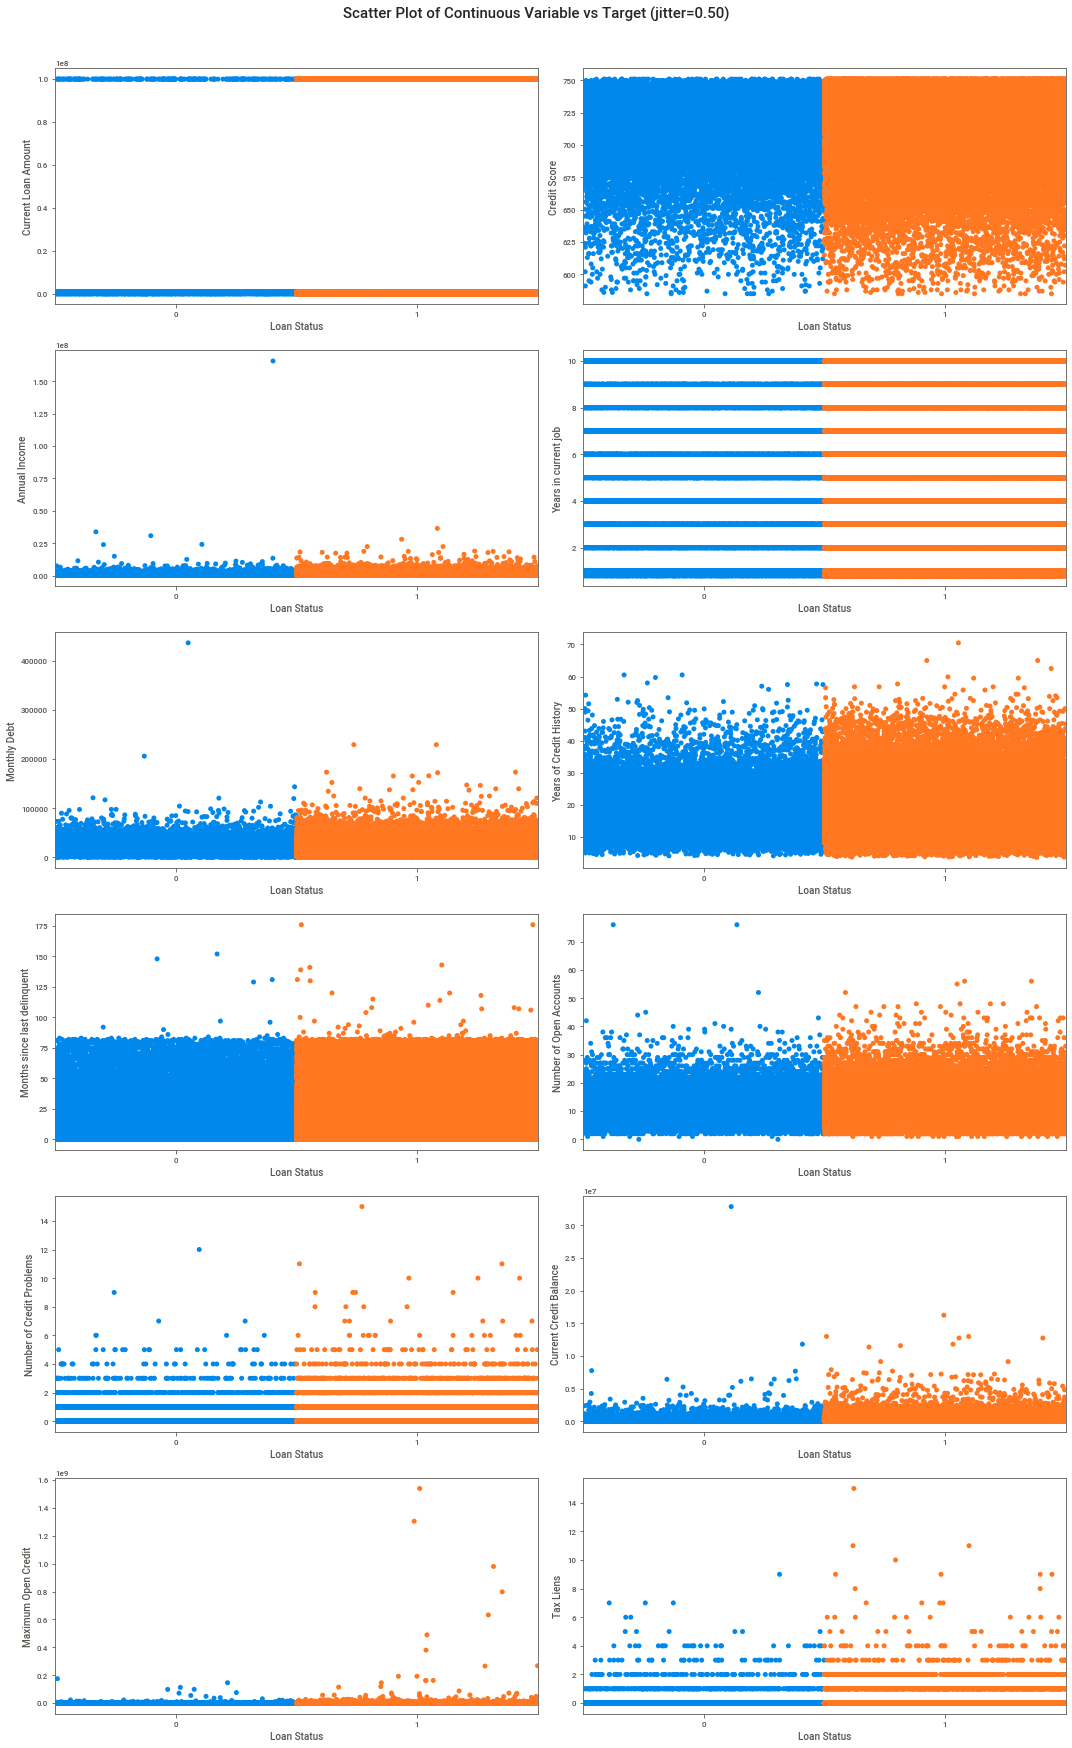

Total Number of Scatter Plots = 78


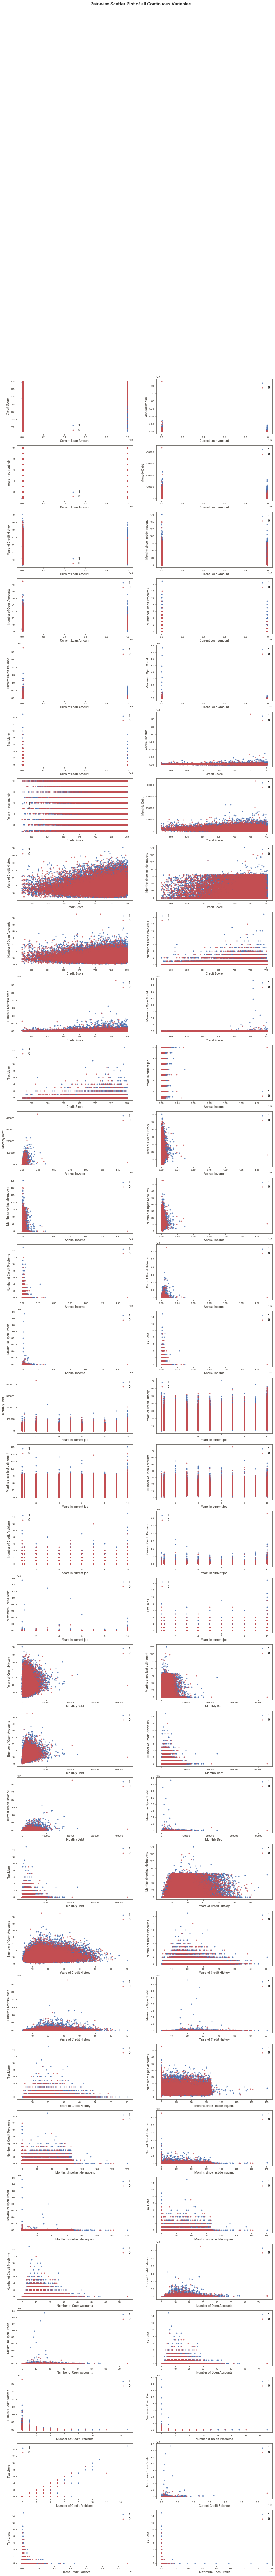

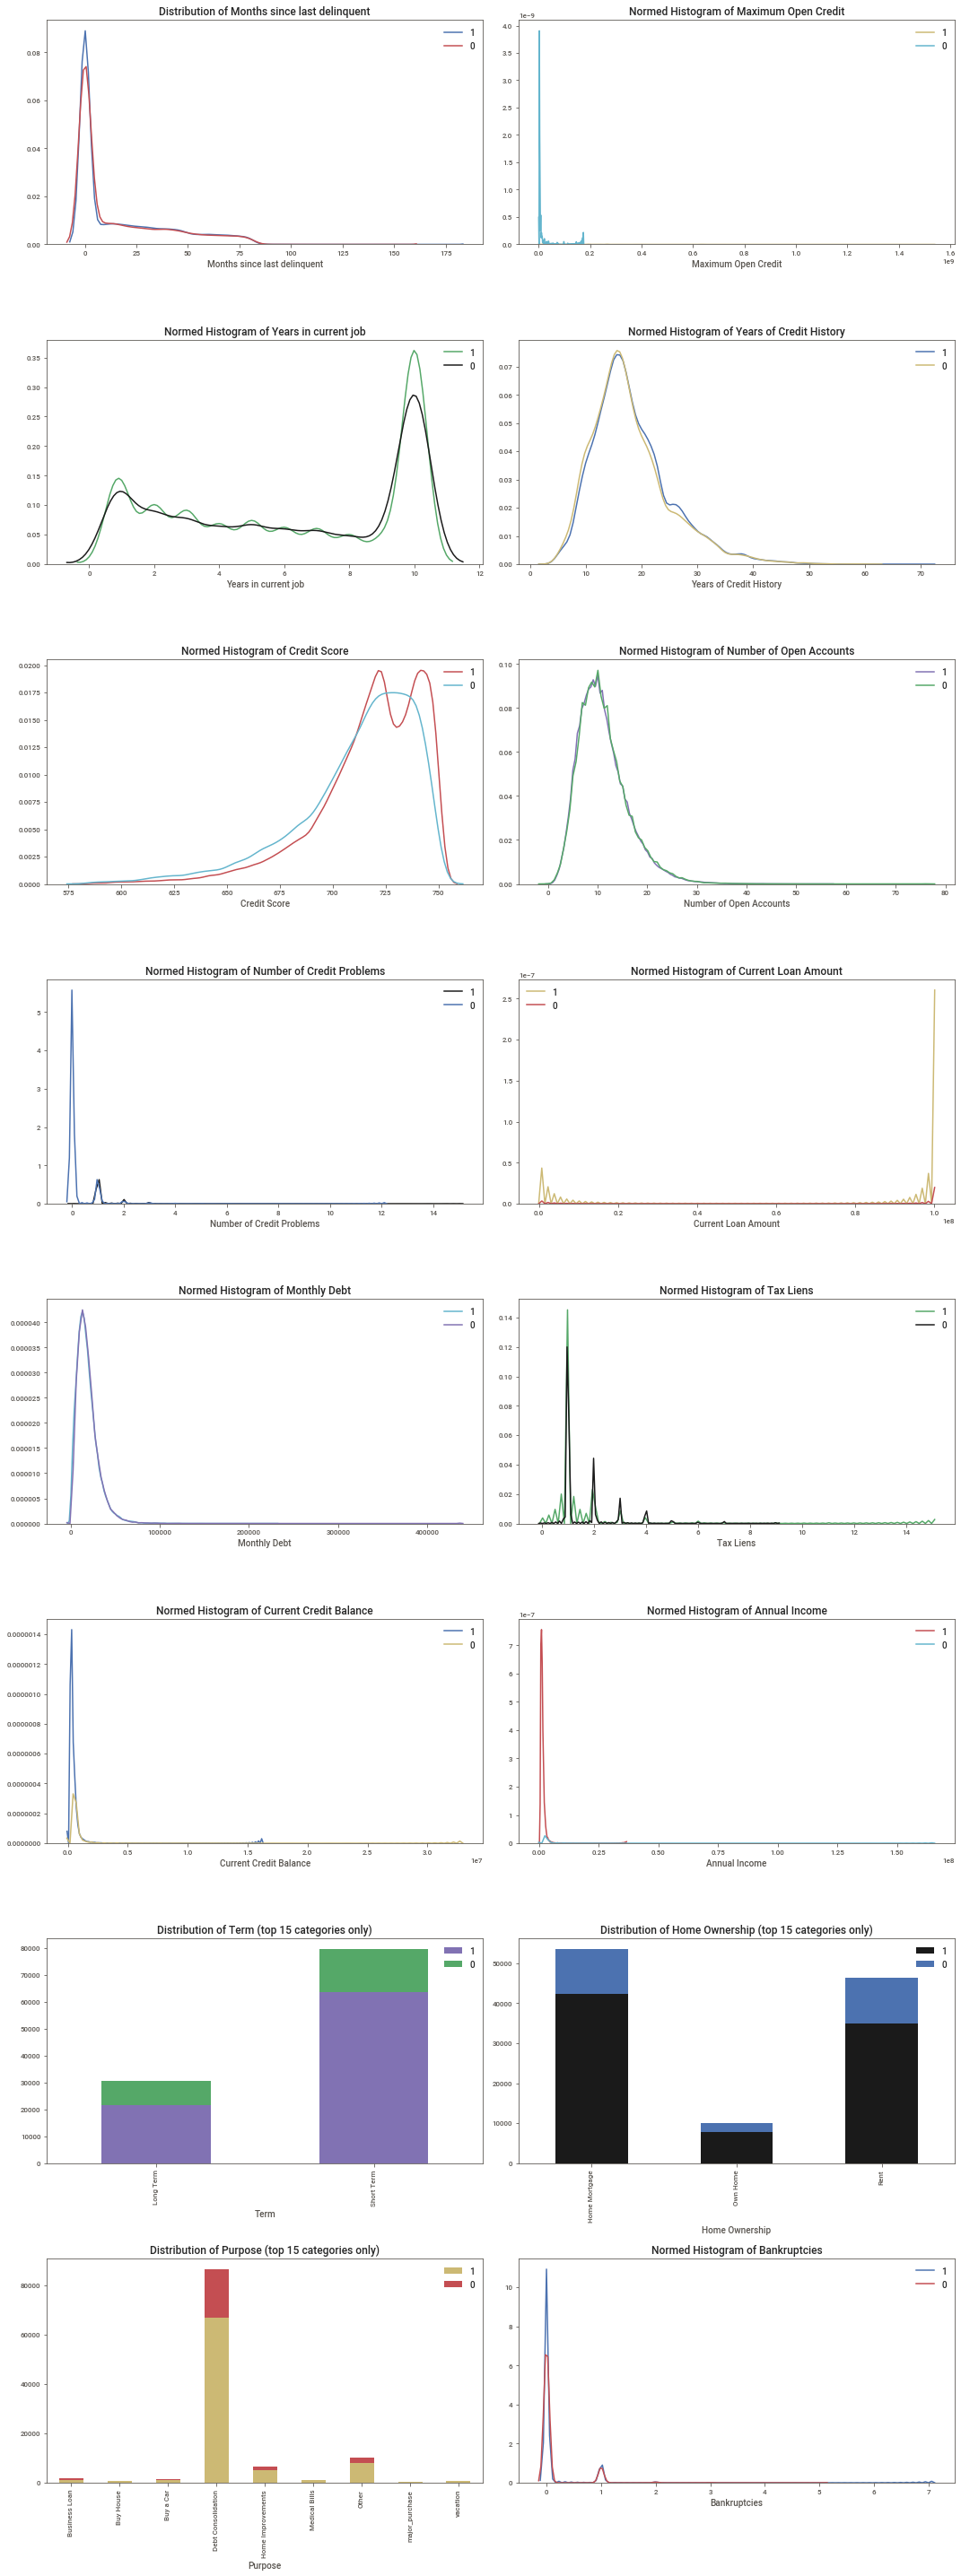

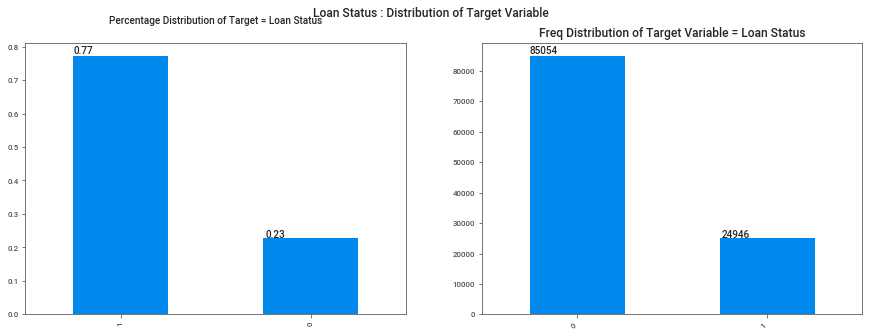

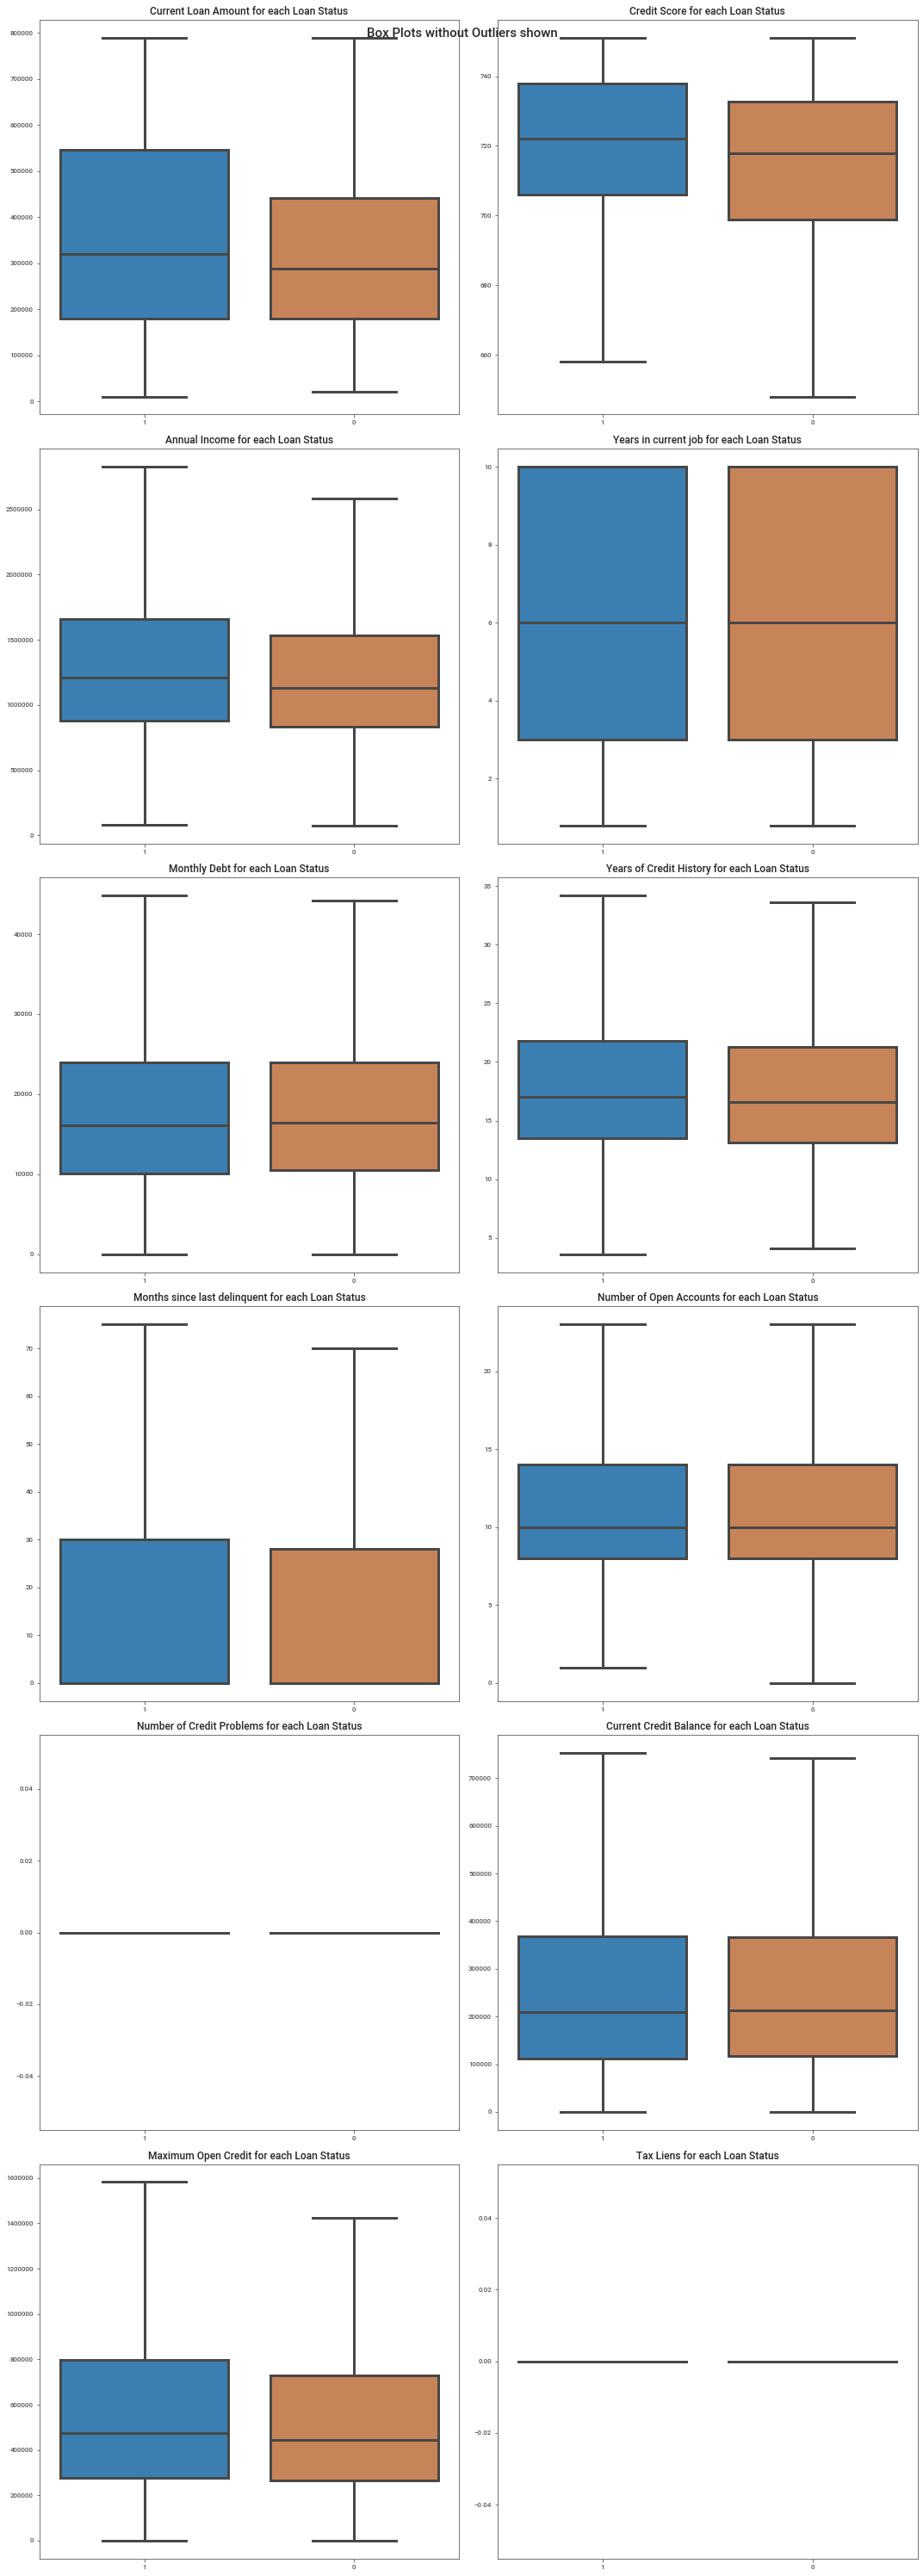

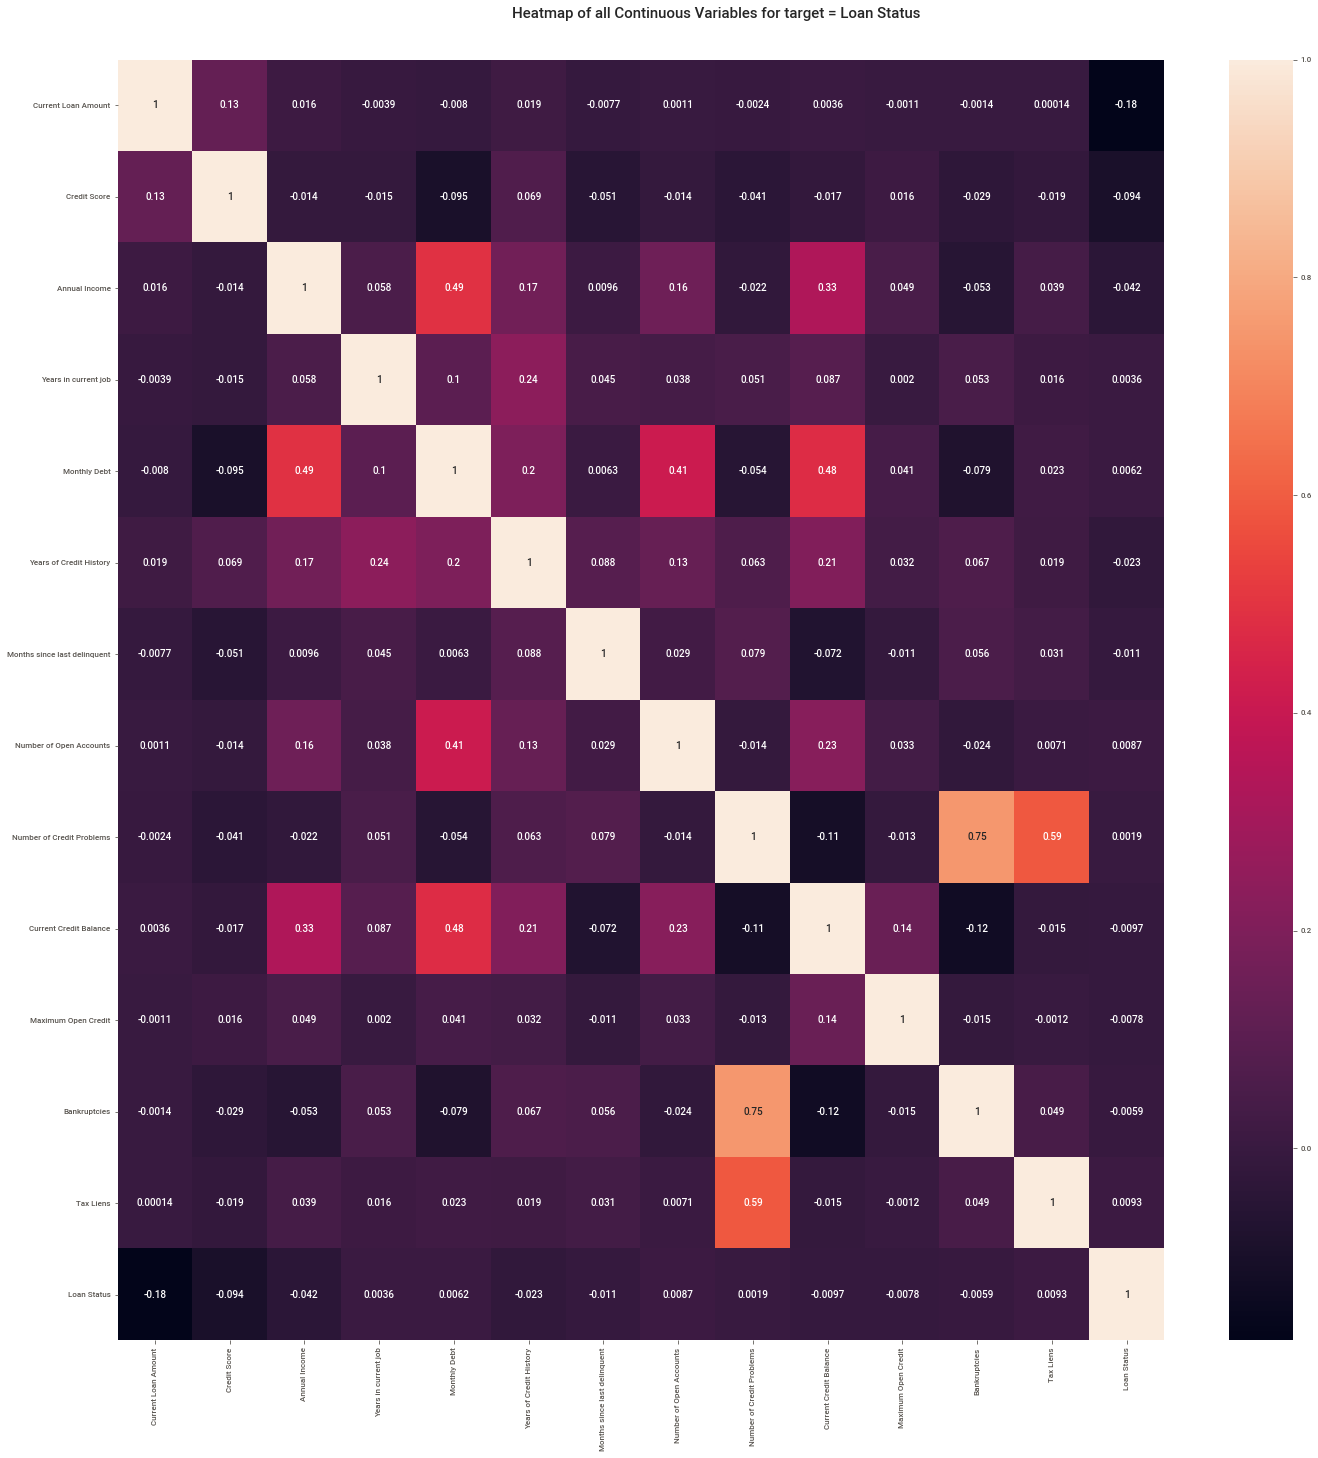

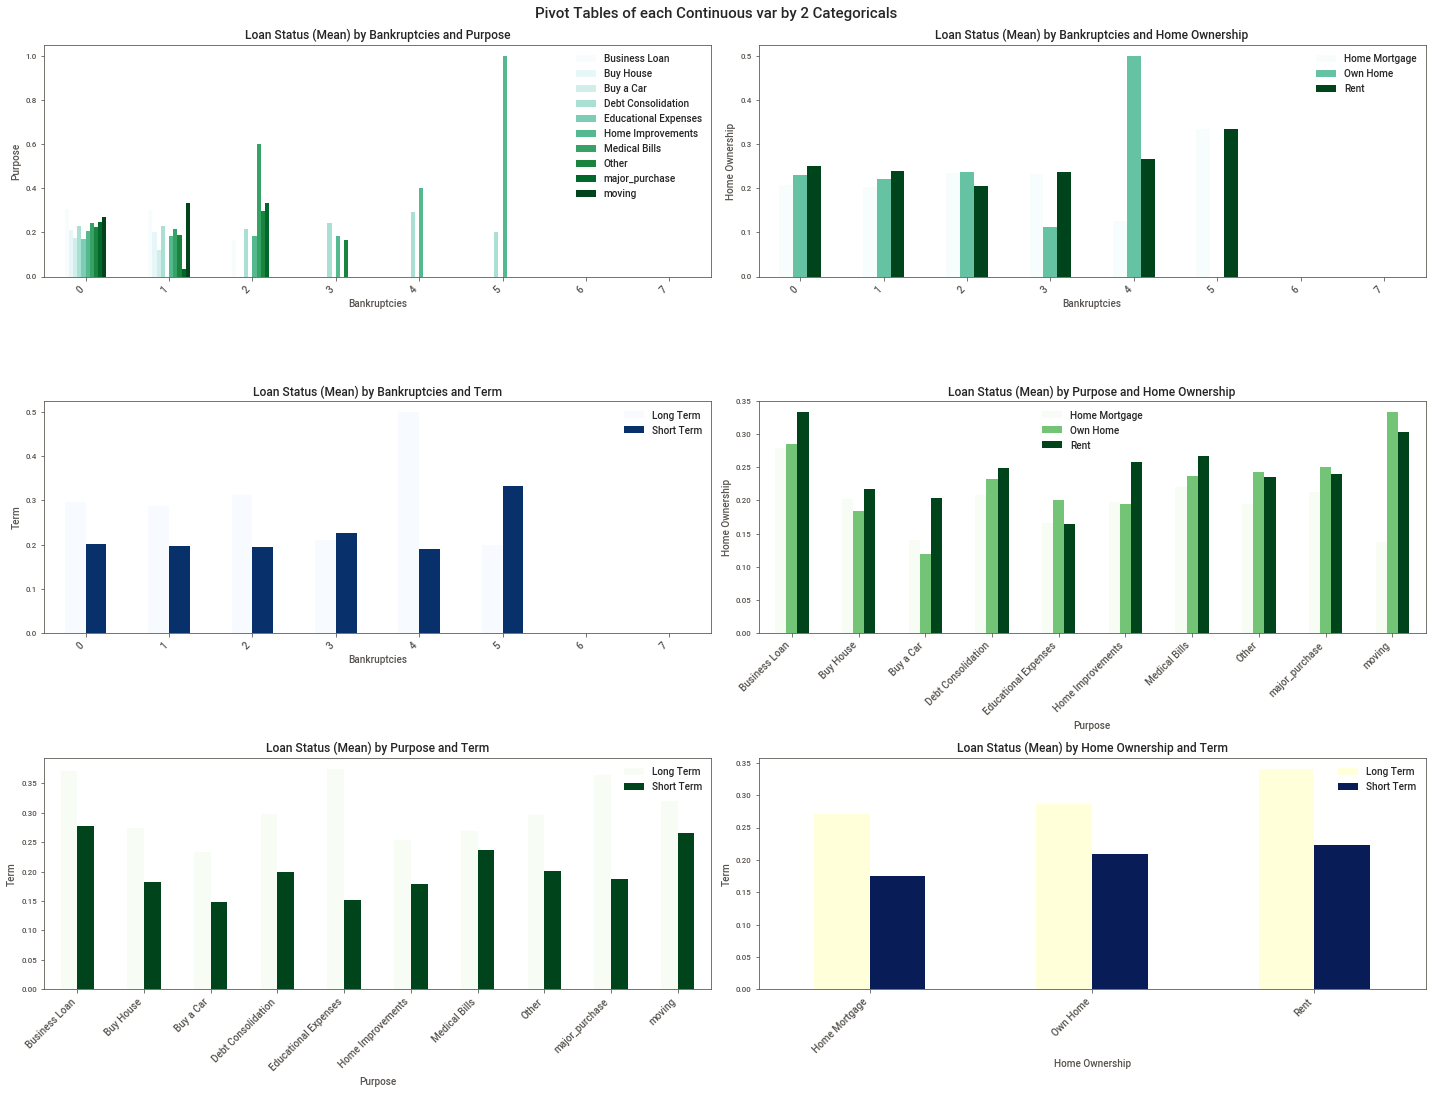

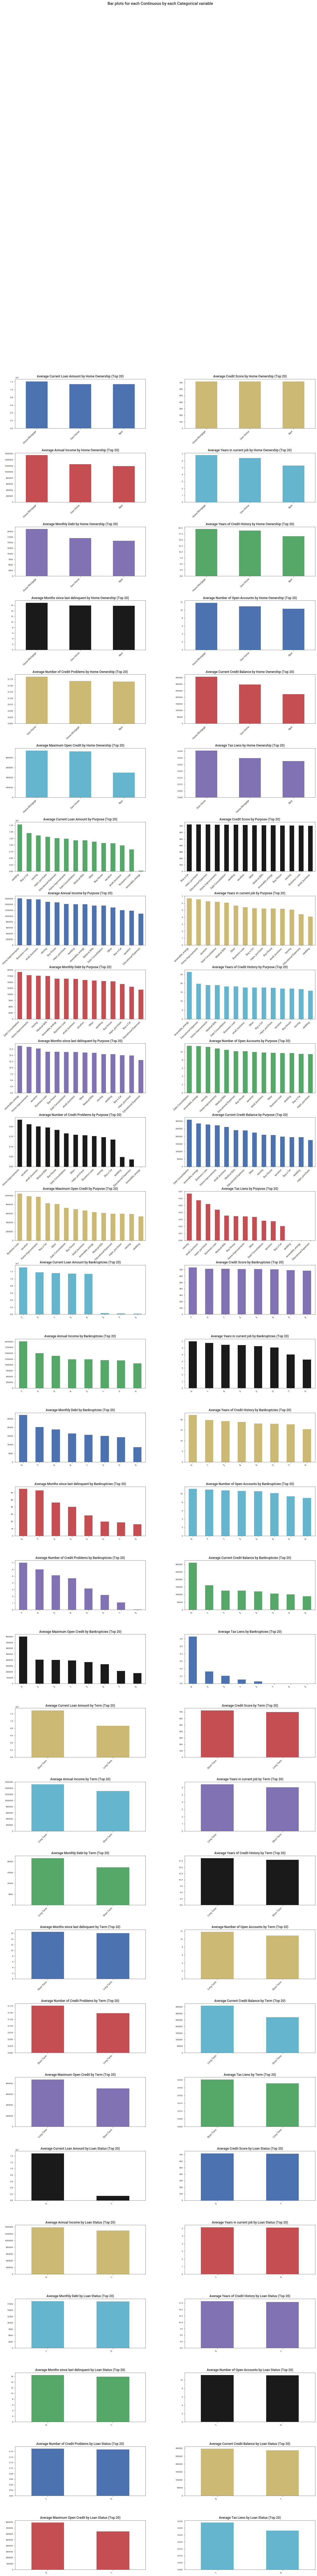

Time to run AutoViz (in seconds) = 81.494

 ###################### VISUALIZATION Completed ########################


In [248]:
dft=loan_av.AutoViz(filename='',dfte=New_Data,verbose=1,depVar='Loan Status')

In [249]:
##saving the current file.

New_Data.to_csv('D:\\iNeuron\\intership_2\\credit_ver9.csv',index=False)

### Checking MultiCollinearity 

In [165]:
# Calculating VIF for the numeric data
vif = pd.DataFrame()
vif["variables"] = trans_dataframe.columns
vif["VIF"] = [variance_inflation_factor(trans_dataframe.values, i) for i in range(trans_dataframe.shape[1])]

In [162]:
vif

variables        VIF
0            Current Loan Amount   1.141577
1                   Credit Score  13.374673
2                  Annual Income   3.910798
3           Years in current job   4.252772
4                   Monthly Debt   5.855366
5        Years of Credit History   8.887495
6   Months since last delinquent   1.540121
7        Number of Open Accounts   7.203893
8      Number of Credit Problems   8.546818
9         Current Credit Balance   2.246256
10           Maximum Open Credit   1.031406
11                  Bankruptcies   5.558151
12                     Tax Liens   3.364386

Looks like the credit score is higly correlated with other variables .

In [3]:
data=pd.read_csv('D:\\iNeuron\\intership_2\\credit_ver9.csv')

We have observed while exploing data that Number of Credit Problems ,Bankruptcies & Tax Liens are higly correlated (positive) . All show how much bad the financial condition of the customer is currently. We will proceed with 'Number of Credit Problems' and drop other two features or columns. Later we can try adding these features and check if any increment in model performance.

In [4]:
data.drop(['Bankruptcies','Tax Liens'],axis=1,inplace=True)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Loan Status                   110000 non-null  int64  
 12  Term                          110000 non-nul

In [8]:
data[['Current Loan Amount','Annual Income','Monthly Debt','Current Credit Balance']].describe()

Current Loan Amount    Annual Income  Monthly Debt  \
count        110000.000000    110000.000000 110000.000000   
mean       11746206.827900   1367203.236140  18468.526823   
std        31767162.177713    993697.100715  12195.564391   
min           10802.000000     76627.000000      0.000000   
25%          179586.000000    868224.000000  10211.930000   
50%          312026.000000   1182003.300000  16202.440000   
75%          523930.000000   1631118.650000  23997.522500   
max        99999999.000000 165557393.000000 435843.280000   

       Current Credit Balance  
count           110000.000000  
mean            294282.171564  
std             377277.271885  
min                  0.000000  
25%             112195.000000  
50%             209665.000000  
75%             367483.750000  
max           32878968.000000

<Figure size 1080x1008 with 0 Axes>

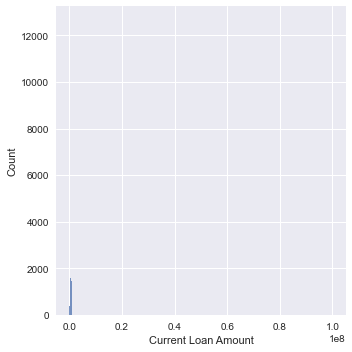

In [9]:
plt.figure(figsize=(15,14))
sns.displot(data['Current Loan Amount'])
plt.show()

In [11]:
# Just checking how many values beyond 100000 dollars
len(data[data['Current Loan Amount']>1000000.000000])

12617

In [10]:
len(data[data['Current Loan Amount']==99999999.000000])

12617

Above shows all values beyond 100000 is entered as 9999999.00000 which looks like an error . We will check the same in boxplot.

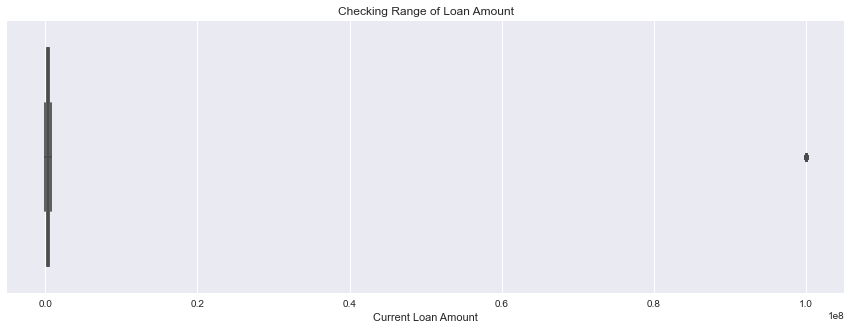

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(data['Current Loan Amount'])
plt.title('Checking Range of Loan Amount')
plt.show()

Above boxplot shows the same.This can be treated as an outlier. We will handle this by first changing the large values to nan and then using KNNImputer.

In [13]:
##first Changing 9999999 to 0

data.replace({'Current Loan Amount':{99999999.000000:0}},inplace=True)

In [14]:
data['Current Loan Amount'].describe()

count   110000.000000
mean    276206.942600
std     201312.164801
min          0.000000
25%     128150.000000
50%     241175.000000
75%     401896.000000
max     789250.000000
Name: Current Loan Amount, dtype: float64

In [15]:
data['Current Loan Amount'].describe()

count   110000.000000
mean    276206.942600
std     201312.164801
min          0.000000
25%     128150.000000
50%     241175.000000
75%     401896.000000
max     789250.000000
Name: Current Loan Amount, dtype: float64

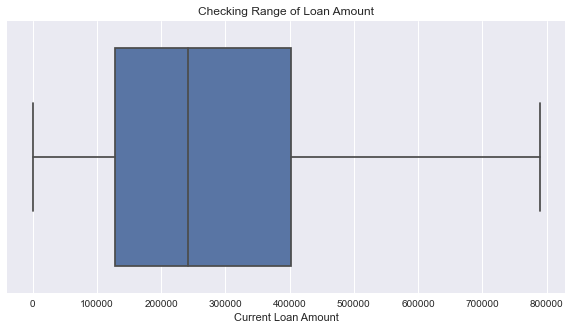

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Current Loan Amount'])
plt.title('Checking Range of Loan Amount')
plt.show()

All extreme values are now converted to zero .

In [17]:
##Next will convert them to NAN so that we can impute
data['Current Loan Amount'].replace(0,np.nan,inplace=True)

In [18]:
##Checking if  null values are created.
data.isnull().sum()

Current Loan Amount             12617
Credit Score                        0
Annual Income                       0
Years in current job                0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Loan Status                         0
Term                                0
Home Ownership                      0
Purpose                             0
dtype: int64

In [ ]:
##Checking if  null values are created.
data.isnull().sum()

In [19]:
##getting the numerical columns together as KNNImputer will need numerical columns.
num_cols=data.select_dtypes(include=np.number)

In [20]:
num_cols=data.select_dtypes(include=np.number)

In [21]:
impute_knn=KNNImputer()

In [23]:
trans=impute_knn.fit_transform(num_cols)

In [24]:
type(trans)

numpy.ndarray

In [25]:
imputed_data=pd.DataFrame(trans,columns=['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Loan Status'])

In [26]:
imputed_data.isnull().sum()

Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years in current job            0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Loan Status                     0
dtype: int64

In [27]:
imputed_data.describe()

Current Loan Amount  Credit Score    Annual Income  \
count        110000.000000 110000.000000    110000.000000   
mean         312484.539240    716.286718   1367203.236140   
std          181241.576848     26.477465    993697.100715   
min           10802.000000    585.000000     76627.000000   
25%          175054.000000    704.000000    868224.000000   
50%          269324.000000    721.000000   1182003.300000   
75%          430408.000000    736.400000   1631118.650000   
max          789250.000000    751.000000 165557393.000000   

       Years in current job  Monthly Debt  Years of Credit History  \
count         110000.000000 110000.000000            110000.000000   
mean               6.128938  18468.526823                18.202485   
std                3.544057  12195.564391                 7.015575   
min                0.800000      0.000000                 3.600000   
25%                3.000000  10211.930000                13.500000   
50%                6.000000  16202.440000                16.900000   
75%               10.000000  23997.522500                21.700000   
max               10.000000 435843.280000                70.500000   

       Months since last delinquent  Number of Open Accounts  \
count                 110000.000000            110000.000000   
mean                      16.359682                11.124491   
std                       23.011923                 5.011093   
min                        0.000000                 0.000000   
25%                        0.000000                 8.000000   
50%                        0.000000                10.000000   
75%                       30.000000                14.000000   
max                      176.000000                76.000000   

       Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
count              110000.000000           110000.000000        110000.000000   
mean                    0.168055           294282.171564        754088.666840   
std                     0.484389           377277.271885       8013929.854632   
min                     0.000000                0.000000             0.000000   
25%                     0.000000           112195.000000        273152.000000   
50%                     0.000000           209665.000000        467379.000000   
75%                     0.000000           367483.750000        783183.500000   
max                    15.000000         32878968.000000    1539737892.000000   

        Loan Status  
count 110000.000000  
mean       0.773218  
std        0.418752  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

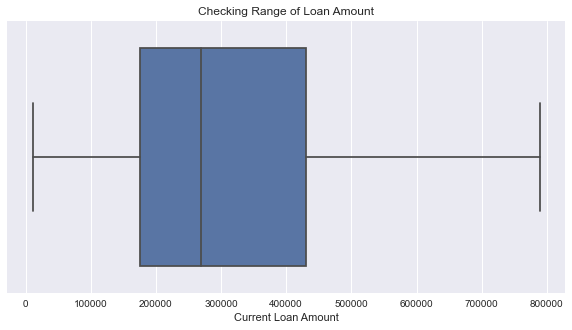

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(imputed_data['Current Loan Amount'])
plt.title('Checking Range of Loan Amount')
plt.show()

In [29]:
##Before concating dataset we will check for one categorical feature before encoding

cat_cols=data.select_dtypes(exclude=np.number)

In [30]:
data.select_dtypes(exclude=np.number).columns.to_list()

['Term', 'Home Ownership', 'Purpose']

In [31]:
len(data['Purpose'].unique())

14

In [32]:
data['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'Other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'vacation',
       'small_business', 'Medical Bills', 'wedding',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

Looks like all are Unique . We will go ahead with encoding this features. Later on we can see if further modification can be done on this categorical feature.

In [33]:
new_data=pd.concat([imputed_data,data[data.select_dtypes(exclude=np.number).columns.to_list()]],axis=1)

In [34]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           110000 non-null  float64
 1   Credit Score                  110000 non-null  float64
 2   Annual Income                 110000 non-null  float64
 3   Years in current job          110000 non-null  float64
 4   Monthly Debt                  110000 non-null  float64
 5   Years of Credit History       110000 non-null  float64
 6   Months since last delinquent  110000 non-null  float64
 7   Number of Open Accounts       110000 non-null  float64
 8   Number of Credit Problems     110000 non-null  float64
 9   Current Credit Balance        110000 non-null  float64
 10  Maximum Open Credit           110000 non-null  float64
 11  Loan Status                   110000 non-null  float64
 12  Term                          110000 non-nul

In [ ]:
##saving the current file.
new_data.to_csv('D:\\iNeuron\\intership_2\\credit_ver10.csv',index=False)

In [84]:
print("*********"*10)

******************************************************************************************
